#Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
Kenpom2024 = pd.read_csv('KenPom2024.csv', header='infer')
NcaaStats = pd.read_csv('CBBStats11-29.csv', header='infer')
schedule2024 = pd.read_csv('NCAA_Hoops_Results_11_28_2023.csv', header='infer')
Kenpom2024 = Kenpom2024.rename(columns={"TeamName": "School"})
NcaaStats = NcaaStats.rename(columns={"Team": "School"})
schedule2024 = schedule2024.rename(columns={"team": "School"})

In [ ]:
Kenpom2024.head()

,Season,School,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,2024,Abilene Christian,68.6521,232,66.6700,286,98.9990,242,105.1390,165,103.0170,165,104.513,165,0.626437,150
1,2024,Air Force,64.1224,344,61.9136,360,101.4660,211,99.0048,286,94.5018,55,101.058,103,-2.053410,187
2,2024,Akron,68.5125,235,69.0871,172,102.2410,200,105.0690,166,101.4960,141,100.505,99,4.563370,122
3,2024,Alabama,72.6911,67,72.7215,36,130.6000,1,122.3790,1,104.5540,193,100.080,88,22.299600,15
4,2024,Alabama A&M,73.0675,55,70.9366,95,90.8082,324,94.3920,346,120.5270,351,113.307,345,-18.914500,352


In [ ]:
schedule2024 = schedule2024[schedule2024['D1'] == 2]
schedule2024 = schedule2024[schedule2024['canceled'] == False]

schedule2024.head()

,year,month,day,School,opponent,location,teamscore,oppscore,canceled,postponed,OT,D1
1,2023,11,11,A&M-Corpus Christi,Houston,V,50.0,82.0,False,False,NaN,2
3,2023,11,16,A&M-Corpus Christi,Texas Tech,V,64.0,73.0,False,False,NaN,2
4,2023,11,22,A&M-Corpus Christi,Northern Ky.,V,73.0,88.0,False,False,NaN,2
5,2023,11,24,A&M-Corpus Christi,LIU,N,68.0,83.0,False,False,NaN,2
6,2023,11,29,A&M-Corpus Christi,UTEP,V,NaN,NaN,False,False,NaN,2


In [ ]:
NcaaStats.head()

,#,School,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp RPG,Opp APG,Opp SPG,Opp BPG,Opp TOV,Opp PF
0,300,Abilene Christian,6,40.0,67.8,23.5,58.2,0.404,5.3,16.3,...,23.0,0.725,9.8,26.5,36.3,10.8,5.8,3.2,12.3,18.5
1,320,Air Force,8,40.6,66.3,22.6,50.9,0.445,7.9,23.3,...,17.9,0.685,8.4,22.8,31.1,9.1,4.6,1.9,11.6,18.3
2,156,Akron,7,40.0,76.4,26.6,57.1,0.465,9.7,26.9,...,12.7,0.663,6.6,20.0,26.6,14.9,8.6,2.7,13.0,17.0
3,2,Alabama,7,40.0,94.9,30.7,60.3,0.509,10.3,25.3,...,21.3,0.691,7.7,19.6,27.3,10.0,6.9,3.3,11.9,23.4
4,318,Alabama A&M,5,40.0,66.4,22.0,57.6,0.382,4.0,15.4,...,27.4,0.774,8.8,25.0,33.8,18.0,9.6,4.6,14.0,21.0


In [ ]:
merged_test = pd.merge(NcaaStats, Kenpom2024[['School', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo', 'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE', 'RankAdjDE', 'AdjEM', 'RankAdjEM']], on='School', how='inner')
merged_test

,#,School,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,300,Abilene Christian,6,40.0,67.8,23.5,58.2,0.404,5.3,16.3,...,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150
1,320,Air Force,8,40.6,66.3,22.6,50.9,0.445,7.9,23.3,...,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187
2,156,Akron,7,40.0,76.4,26.6,57.1,0.465,9.7,26.9,...,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122
3,2,Alabama,7,40.0,94.9,30.7,60.3,0.509,10.3,25.3,...,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15
4,318,Alabama A&M,5,40.0,66.4,22.0,57.6,0.382,4.0,15.4,...,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,212,Wisconsin,7,39.7,73.9,26.4,57.0,0.464,5.9,19.0,...,113.0410,56,115.5490,23,96.8521,83,95.9641,34,19.584800,23
254,116,Wofford,7,40.7,78.3,27.3,61.6,0.443,9.1,28.1,...,103.1060,183,102.8460,203,117.5930,340,111.0240,322,-8.177940,275
255,149,Wyoming,6,40.0,76.8,26.3,55.7,0.473,7.5,19.2,...,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186
256,137,Xavier,7,40.0,77.1,28.4,61.0,0.466,6.3,20.0,...,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41


# Data Preprocessing

In [ ]:
NcaaStats['School'] = NcaaStats['School'].replace({'Alabama State': 'Alabama St.',
                                                   'Alcorn State': 'Alcorn St.',
                                                   'American University': 'American',
                                                   'Appalachian State': 'Appalachian St.',
                                                   'Arkansas-Pine Bluff': 'Arkansas Pine Bluff',
                                                   'Arkansas State': 'Arkansas St.',
                                                   'Army West Point': 'Army',
                                                   'Arizona State': 'Arizona St.',
                                                   'Ball State': 'Ball St.',
                                                   'Bethune-Cookman': 'Bethune Cookman',
                                                   'Boise State': 'Boise St.',
                                                   'Brigham Young': 'BYU',
                                                   'California Baptist': 'Cal Baptist',
                                                   'Cal State Bakersfield': 'Cal St. Bakersfield',
                                                   'Cal State Fullerton': 'Cal St. Fullerton',
                                                   'Cal State Northridge': 'Cal St. Northridge',
                                                   'Central Connecticut State': 'Central Connecticut',
                                                   'Chicago State': 'Chicago St.',
                                                   'Cleveland State': 'Cleveland St.',
                                                   'Colorado State': 'Colorado St.',
                                                   'Coppin State': 'Coppin St.',
                                                   'UConn': 'Connecticut',
                                                   'Delaware State': 'Delaware St.',
                                                   'Detroit-Mercy': 'Detroit Mercy',
                                                   'East Tennessee State': 'East Tennessee St.',
                                                   'Florida International': 'FIU',
                                                   'Florida State': 'Florida St.',
                                                   'Fresno State': 'Fresno St.',
                                                   'Fort Wayne': 'Purdue Fort Wayne',
                                                   'Gardner-Webb': 'Gardner Webb',
                                                   'Georgia State': 'Georgia St.',
                                                   'Grambling State': 'Grambling St.',
                                                   'Idaho State': 'Idaho St.',
                                                   'Illinois-Chicago': 'Illinois Chicago',
                                                   'Illinois State': 'Illinois St.',
                                                   'Indiana State': 'Indiana St.',
                                                   'Iowa State': 'Iowa St.',
                                                   'Jackson State': 'Jackson St.',
                                                   'Jacksonville State': 'Jacksonville St.',
                                                   'Kansas State': 'Kansas St.', #40
                                                   'Kennesaw State': 'Kennesaw St.',
                                                   'Kent State': 'Kent St.',
                                                   'Long Beach State': 'Long Beach St.',
                                                   'Louisiana-Monroe': 'Louisiana Monroe',
                                                   'Loyola (IL)': 'Loyola Chicago',
                                                   'Loyola (MD)': 'Loyola MD',
                                                   'Maryland-Eastern Shore': 'Maryland Eastern Shore',
                                                   'McNeese State': 'McNeese St.',
                                                   'Merrimack College': 'Merrimack',
                                                   'Miami (FL)': 'Miami FL', #50
                                                   'Miami (OH)': 'Miami OH',
                                                   'Michigan State': 'Michigan St.',
                                                   'Middle Tennessee State': 'Middle Tennessee',
                                                   'Ole Miss': 'Mississippi',
                                                   'Mississippi State': 'Mississippi St.',
                                                   'Mississippi Valley State': 'Mississippi Valley St.',
                                                   'Missouri State': 'Missouri St.',
                                                   'Montana State': 'Montana St.',
                                                   'Morehead State': 'Morehead St.',
                                                   'Morgan State': 'Morgan St.', #60
                                                   'Murray State': 'Murray St.',
                                                   'NC State': 'N.C. State',
                                                   'N.J.I.T.': 'NJIT',
                                                   'Omaha': 'Nebraska Omaha',
                                                   'New Mexico State': 'New Mexico St.',
                                                   'Nicholls State': 'Nicholls St.',
                                                   'Norfolk State': 'Norfolk St.',
                                                   'North Dakota State': 'North Dakota St.',
                                                   'Northwestern State': 'Northwestern St.',
                                                   'Ohio State': 'Ohio St.', #70
                                                   'Oklahoma State': 'Oklahoma St.',
                                                   'Oregon State': 'Oregon St.',
                                                   'Pennsylvania': 'Penn',
                                                   'Penn State': 'Penn St.',
                                                   'Portland State': 'Portland St.',
                                                   'Queens University': 'Queens',
                                                   'Sacramento State': 'Sacramento St.',
                                                   'St. Francis (PA)': 'Saint Francis',
                                                   'Sam Houston State': 'Sam Houston St.',
                                                   'San Diego State': 'San Diego St.', #80
                                                   'San Jose State': 'San Jose St.',
                                                   'SIU-Edwardsville': 'SIU Edwardsville',
                                                   'Southern Methodist': 'SMU',
                                                   'South Carolina State': 'South Carolina St.',
                                                   'South Dakota State': 'South Dakota St.',
                                                   'Southeast Missouri State': 'Southeast Missouri St.',
                                                   'Southern Mississippi': 'Southern Miss',
                                                   'St. Thomas-Minnesota': 'St. Thomas',
                                                   'Tarleton State': 'Tarleton St.',
                                                   'Tennessee-Martin': 'Tennessee Martin', #90
                                                   'Tennessee State': 'Tennessee St.',
                                                   'Texas A&M-CC': 'Texas A&M Corpus Chris',
                                                   'Texas State': 'Texas St.',
                                                   'Texas-Arlington': 'UT Arlington',
                                                   'Texas-RGV': 'UT Rio Grande Valley',
                                                   'Texas-San Antonio': 'UTSA',
                                                   'Utah State': 'Utah St.',
                                                   'Virginia Military': 'VMI',
                                                   'Washington State': 'Washington St.',
                                                   'Weber State': 'Weber St.', #100
                                                   'Wichita State': 'Wichita St.',
                                                   'Wright State': 'Wright St.',
                                                   'Youngstown State': 'Youngstown St.',
                                                   'Long Island': 'LIU'})

In [ ]:
merged_stats = pd.merge(NcaaStats, Kenpom2024[['School', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo', 'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE', 'RankAdjDE', 'AdjEM', 'RankAdjEM']], on='School', how='inner')
#pd.set_option('display.max_rows', 99999)
merged_stats

,#,School,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,300,Abilene Christian,6,40.0,67.8,23.5,58.2,0.404,5.3,16.3,...,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150
1,320,Air Force,8,40.6,66.3,22.6,50.9,0.445,7.9,23.3,...,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187
2,156,Akron,7,40.0,76.4,26.6,57.1,0.465,9.7,26.9,...,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122
3,2,Alabama,7,40.0,94.9,30.7,60.3,0.509,10.3,25.3,...,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15
4,318,Alabama A&M,5,40.0,66.4,22.0,57.6,0.382,4.0,15.4,...,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,99,Wright St.,6,40.0,79.2,29.3,60.0,0.489,6.5,18.2,...,110.2950,74,110.8070,65,113.6010,315,107.4360,237,3.371700,128
358,149,Wyoming,6,40.0,76.8,26.3,55.7,0.473,7.5,19.2,...,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186
359,137,Xavier,7,40.0,77.1,28.4,61.0,0.466,6.3,20.0,...,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41
360,166,Yale,7,41.4,76.0,28.6,60.1,0.475,7.0,19.3,...,104.3530,164,110.0200,72,105.6990,217,101.9570,116,8.062190,87


In [ ]:
merged_stats = merged_stats.assign(Carolan_Score = merged_stats.AdjEM *1.5
                                   + merged_stats.PPG
                                   - merged_stats['Opp PPG']
                                   + merged_stats['3PM']* 1.5
                                   + merged_stats.FGM
                                   - merged_stats['3PM']
                                   + merged_stats['FG%']* 100
                                   - merged_stats['Opp FG%'] * 100
                                   + merged_stats.TOV * 2
                                   - merged_stats['Opp TOV']* 2
                                   + merged_stats['FT%']* 20
                                   - merged_stats['Opp FTA'] * .5
                                   + merged_stats.RPG
                                   - merged_stats['Opp RPG']
                                   + merged_stats.APG
                                   - merged_stats['Opp APG']
                                   + merged_stats['3P%'] * 150
                                   - merged_stats['Opp 3P%'] * 150
                                   + merged_stats.ORB * 3
                                   - merged_stats['Opp ORB'] * 3)
merged_stats.sort_values(by=['Carolan_Score'], ascending=[False], inplace=True)
merged_stats['Carolan_Rank'] = merged_stats['Carolan_Score'].rank(ascending=False)
merged_stats[['School', 'Carolan_Score', 'Carolan_Rank']]
print(merged_stats[['School', 'Carolan_Score', 'Carolan_Rank']].to_markdown())


|     | School                 |   Carolan_Score |   Carolan_Rank |
|----:|:-----------------------|----------------:|---------------:|
|  29 | BYU                    |      198.012    |              1 |
|  10 | Arizona                |      189.202    |              2 |
| 237 | Purdue                 |      167.48     |              3 |
| 319 | Connecticut            |      160.233    |              4 |
|  19 | Baylor                 |      153.161    |              5 |
| 141 | Liberty                |      149.39     |              6 |
| 102 | Gonzaga                |      147.522    |              7 |
| 112 | Houston                |      146.278    |              8 |
|  61 | Creighton              |      145.496    |              9 |
| 117 | Illinois               |      141.707    |             10 |
| 131 | Kansas                 |      139.567    |             11 |
|  16 | Auburn                 |      139.06     |             12 |
| 218 | Oklahoma               |      138.605   

In [ ]:
merged_stats

,#,School,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,Carolan_Score,Carolan_Rank
29,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,117.0640,16,82.6094,6,93.5354,17,23.5281,10,198.01215,1.0
10,1,Arizona,6,40.0,95.3,34.2,66.5,0.514,8.2,20.8,...,119.0600,8,83.8212,7,91.6122,8,27.4481,4,189.20215,2.0
237,40,Purdue,7,39.9,84.1,28.4,57.4,0.495,8.9,20.7,...,120.7320,4,88.1915,17,90.5652,5,30.1668,2,167.48020,3.0
319,13,Connecticut,7,39.6,88.7,31.6,61.4,0.514,7.9,25.4,...,119.9670,6,87.0248,11,92.0915,9,27.8751,3,160.23265,4.0
19,4,Baylor,7,39.9,93.0,32.1,61.9,0.520,8.9,20.0,...,121.9690,2,100.4520,126,97.6215,45,24.3471,6,153.16065,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,264,Houston Christian,5,39.8,70.6,26.8,61.2,0.438,3.0,14.2,...,95.7148,330,120.1850,350,116.9860,360,-21.2710,358,-72.00650,358.0
85,357,Florida A&M,4,39.8,57.5,23.0,62.0,0.371,3.5,12.5,...,93.2656,353,123.3020,358,108.8120,277,-15.5464,336,-92.04960,359.0
200,294,North Carolina A&T,6,39.7,68.3,22.0,59.8,0.368,8.0,27.5,...,96.4346,322,127.7250,362,119.6350,362,-23.2002,360,-107.53030,360.0
59,361,Coppin St.,7,40.0,51.6,18.1,51.3,0.354,4.0,17.4,...,85.7279,362,110.9220,286,110.9630,319,-25.2347,361,-110.66205,361.0


In [ ]:
schedule2024['School'] = schedule2024['School'].replace({'A&M-Corpus Christi': 'Texas A&M Corpus Chris',
                                               'Alcorn': 'Alcorn St.',
                                               'App State': 'Appalachian St.',
                                               'Ark.-Pine Bluff':'Arkansas Pine Bluff',
                                               'Army West Point': 'Army',
                                               'Bethune-Cookman':'Bethune Cookman',
                                               'Boston U.': 'Boston University',
                                               'California Baptist':'Cal Baptist',
                                               'CSU Bakersfield':'Cal St. Bakersfield',
                                               'CSUN':'Cal St. Northridge',
                                               'Central Ark.':'Central Arkansas',
                                               'Central Conn. St.':'Central Connecticut',
                                               'Central Mich.':'Central Michigan',
                                               'Col. of Charleston':'Charleston',
                                               'Charleston So.':'Charleston Southern',
                                               'UConn':'Connecticut',
                                               'ETSU':'East Tennessee St.',
                                               'Eastern Ill.':'Eastern Illinois',
                                               'Eastern Ky.':'Eastern Kentucky',
                                               'Eastern Mich.':'Eastern Michigan',
                                               'Eastern Wash.':'Eastern Washington',
                                               'FDU':'Fairleigh Dickinson',
                                               'Fla. Atlantic':'Florida Atlantic',
                                               'FGCU':'Florida Gulf Coast',
                                               'Gardner-Webb':'Gardner Webb',
                                               'Ga. Southern':'Georgia Southern',
                                               'Grambling':'Grambling St.',
                                               'UIC':'Illinois Chicago',
                                               'UIW':'Incarnate Word',
                                               'Kansas City': 'UMKC',
                                               'Lamar University':'Lamar',
                                               'LMU (CA)': 'Loyola Marymount',
                                               'ULM':'Louisiana Monroe',
                                               'Loyola Maryland': 'Loyola MD',
                                               'UMES': 'Maryland Eastern Shore',
                                               'McNeese': 'McNeese St.',
                                               'Miami (FL)': 'Miami FL',
                                               'Miami (OH)': 'Miami OH',
                                               'Middle Tenn.': 'Middle Tennessee',
                                               'Ole Miss': 'Mississippi',
                                               'Mississippi Val.': 'Mississippi Valley St.',
                                               'NC State': 'N.C. State',
                                               'N.C. A&T': 'North Carolina A&T',
                                               'N.C. Central': 'North Carolina Central',
                                               'Omaha': 'Nebraska Omaha',
                                               'Nicholls': 'Nicholls St.',
                                               'NIU': 'Northern Illinois',
                                               'North Ala.': 'North Alabama',
                                               'Northern Ariz.': 'Northern Arizona',
                                               'Northern Colo.': 'Northern Colorado',
                                               'UNI': 'Northern Iowa',
                                               'Northern Ky.': 'Northern Kentucky',
                                               'Prairie View': 'Prairie View A&M',
                                               'Queens (NC)': 'Queens',
                                               'Saint Francis (PA)': 'Saint Francis',
                                               "Saint Mary's (CA)": "Saint Mary's",
                                               'Sam Houston': 'Sam Houston St.',
                                               'Seattle U': 'Seattle',
                                               'SFA': 'Stephen F. Austin',
                                               'SIUE': 'SIU Edwardsville',
                                               'South Fla.': 'South Florida',
                                               'Southeast Mo. St.': 'Southeast Missouri St.',
                                               'Southeastern La.': 'Southeastern Louisiana',
                                               'Southern California': 'USC',
                                               'Southern U.': 'Southern',
                                               'Southern Ill.': 'Southern Illinois',
                                               'St. Francis (PA)': 'Saint Francis',
                                               'Southern Ind.': 'Southern Indiana',
                                               'Southern Miss.': 'Southern Miss',
                                               'St. Francis Brooklyn': 'St. Francis NY',
                                               "St. John's (NY)": "St. John's",
                                               'St. Thomas (MN)': 'St. Thomas',
                                               'UT Martin': 'Tennessee Martin',
                                               'Tex. A&M-Commerce': 'Texas A&M Commerce',
                                               'UAlbany': 'Albany',
                                               'UNCW': 'UNC Wilmington',
                                               'UTRGV': 'UT Rio Grande Valley',
                                               'Western Caro.': 'Western Carolina',
                                               'Western Ill.': 'Western Illinois',
                                               'Western Ky.': 'Western Kentucky',
                                               'Western Mich.': 'Western Michigan'})

In [ ]:
schedule2024['opponent'] = schedule2024['opponent'].replace({'A&M-Corpus Christi': 'Texas A&M Corpus Chris',
                                               'Alcorn': 'Alcorn St.',
                                               'App State': 'Appalachian St.',
                                               'Ark.-Pine Bluff':'Arkansas Pine Bluff',
                                               'Army West Point': 'Army',
                                               'Bethune-Cookman':'Bethune Cookman',
                                               'Boston U.': 'Boston University',
                                               'California Baptist':'Cal Baptist',
                                               'CSU Bakersfield':'Cal St. Bakersfield',
                                               'CSUN':'Cal St. Northridge',
                                               'Central Ark.':'Central Arkansas',
                                               'Central Conn. St.':'Central Connecticut',
                                               'Central Mich.':'Central Michigan',
                                               'Col. of Charleston':'Charleston',
                                               'Charleston So.':'Charleston Southern',
                                               'UConn':'Connecticut',
                                               'ETSU':'East Tennessee St.',
                                               'Eastern Ill.':'Eastern Illinois',
                                               'Eastern Ky.':'Eastern Kentucky',
                                               'Eastern Mich.':'Eastern Michigan',
                                               'Eastern Wash.':'Eastern Washington',
                                               'FDU':'Fairleigh Dickinson',
                                               'Fla. Atlantic':'Florida Atlantic',
                                               'FGCU':'Florida Gulf Coast',
                                               'Gardner-Webb':'Gardner Webb',
                                               'Ga. Southern':'Georgia Southern',
                                               'Grambling':'Grambling St.',
                                               'UIC':'Illinois Chicago',
                                               'UIW':'Incarnate Word',
                                               'Kansas City': 'UMKC',
                                               'Lamar University':'Lamar',
                                               'LMU (CA)': 'Loyola Marymount',
                                               'ULM':'Louisiana Monroe',
                                               'Loyola Maryland': 'Loyola MD',
                                               'UMES': 'Maryland Eastern Shore',
                                               'McNeese': 'McNeese St.',
                                               'Miami (FL)': 'Miami FL',
                                               'Miami (OH)': 'Miami OH',
                                               'Middle Tenn.': 'Middle Tennessee',
                                               'Ole Miss': 'Mississippi',
                                               'Mississippi Val.': 'Mississippi Valley St.',
                                               'NC State': 'N.C. State',
                                               'N.C. A&T': 'North Carolina A&T',
                                               'N.C. Central': 'North Carolina Central',
                                               'Omaha': 'Nebraska Omaha',
                                               'Nicholls': 'Nicholls St.',
                                               'NIU': 'Northern Illinois',
                                               'North Ala.': 'North Alabama',
                                               'Northern Ariz.': 'Northern Arizona',
                                               'Northern Colo.': 'Northern Colorado',
                                               'UNI': 'Northern Iowa',
                                               'Northern Ky.': 'Northern Kentucky',
                                               'Prairie View': 'Prairie View A&M',
                                               'Queens (NC)': 'Queens',
                                               'Saint Francis (PA)': 'Saint Francis',
                                               "Saint Mary's (CA)": "Saint Mary's",
                                               'Sam Houston': 'Sam Houston St.',
                                               'Seattle U': 'Seattle',
                                               'SFA': 'Stephen F. Austin',
                                               'SIUE': 'SIU Edwardsville',
                                               'South Fla.': 'South Florida',
                                               'Southeast Mo. St.': 'Southeast Missouri St.',
                                               'Southeastern La.': 'Southeastern Louisiana',
                                               'Southern California': 'USC',
                                               'Southern U.': 'Southern',
                                               'Southern Ill.': 'Southern Illinois',
                                               'Southern Ind.': 'Southern Indiana',
                                               'Southern Miss.': 'Southern Miss',
                                               'St. Francis Brooklyn': 'St. Francis NY',
                                               "St. John's (NY)": "St. John's",
                                               'St. Thomas (MN)': 'St. Thomas',
                                               'UT Martin': 'Tennessee Martin',
                                               'Tex. A&M-Commerce': 'Texas A&M Commerce',
                                               'UAlbany': 'Albany',
                                               'UNCW': 'UNC Wilmington',
                                               'UTRGV': 'UT Rio Grande Valley',
                                               'Western Caro.': 'Western Carolina',
                                               'Western Ill.': 'Western Illinois',
                                               'Western Ky.': 'Western Kentucky',
                                               'Western Mich.': 'Western Michigan'})

In [ ]:
schedule2024 = schedule2024.drop(['canceled'], axis = 1)
schedule2024 = schedule2024.drop(['D1'], axis=1)
schedule2024 = schedule2024.drop(['OT'], axis=1)
schedule2024 = schedule2024.drop(['postponed'], axis=1)
schedule2024

,year,month,day,School,opponent,location,teamscore,oppscore
1,2023,11,11,Texas A&M Corpus Chris,Houston,V,50.0,82.0
3,2023,11,16,Texas A&M Corpus Chris,Texas Tech,V,64.0,73.0
4,2023,11,22,Texas A&M Corpus Chris,Northern Kentucky,V,73.0,88.0
5,2023,11,24,Texas A&M Corpus Chris,LIU,N,68.0,83.0
6,2023,11,29,Texas A&M Corpus Chris,UTEP,V,NaN,NaN
...,...,...,...,...,...,...,...,...
11104,2024,2,14,Youngstown St.,Robert Morris,H,NaN,NaN
11105,2024,2,17,Youngstown St.,Cleveland St.,V,NaN,NaN
11106,2024,2,23,Youngstown St.,Milwaukee,V,NaN,NaN
11107,2024,2,25,Youngstown St.,Green Bay,V,NaN,NaN


In [ ]:
schedule2024['scoreDif'] = schedule2024['teamscore'] - schedule2024['oppscore']
schedule2024

,year,month,day,School,opponent,location,teamscore,oppscore,scoreDif
1,2023,11,11,Texas A&M Corpus Chris,Houston,V,50.0,82.0,-32.0
3,2023,11,16,Texas A&M Corpus Chris,Texas Tech,V,64.0,73.0,-9.0
4,2023,11,22,Texas A&M Corpus Chris,Northern Kentucky,V,73.0,88.0,-15.0
5,2023,11,24,Texas A&M Corpus Chris,LIU,N,68.0,83.0,-15.0
6,2023,11,29,Texas A&M Corpus Chris,UTEP,V,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11104,2024,2,14,Youngstown St.,Robert Morris,H,NaN,NaN,NaN
11105,2024,2,17,Youngstown St.,Cleveland St.,V,NaN,NaN,NaN
11106,2024,2,23,Youngstown St.,Milwaukee,V,NaN,NaN,NaN
11107,2024,2,25,Youngstown St.,Green Bay,V,NaN,NaN,NaN


In [ ]:
full_merge = pd.merge(merged_stats, schedule2024, on='School', how='inner')

In [ ]:
full_merge

,#,School,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,Carolan_Score,Carolan_Rank,year,month,day,opponent,location,teamscore,oppscore,scoreDif
0,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,198.01215,1.0,2023,11,6,Houston Christian,H,110.0,63.0,47.0
1,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,198.01215,1.0,2023,11,10,San Diego St.,H,74.0,65.0,9.0
2,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,198.01215,1.0,2023,11,15,Southeastern Louisiana,H,105.0,48.0,57.0
3,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,198.01215,1.0,2023,11,18,Morgan St.,H,93.0,50.0,43.0
4,6,BYU,6,39.8,92.3,32.8,67.2,0.489,13.0,33.7,...,198.01215,1.0,2023,11,23,Arizona St.,N,77.0,49.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,362,Mississippi Valley St.,7,40.7,51.4,18.6,52.6,0.353,3.4,12.3,...,-111.78220,362.0,2024,2,24,Texas Southern,H,NaN,NaN,NaN
10558,362,Mississippi Valley St.,7,40.7,51.4,18.6,52.6,0.353,3.4,12.3,...,-111.78220,362.0,2024,2,26,Prairie View A&M,H,NaN,NaN,NaN
10559,362,Mississippi Valley St.,7,40.7,51.4,18.6,52.6,0.353,3.4,12.3,...,-111.78220,362.0,2024,3,2,Arkansas Pine Bluff,V,NaN,NaN,NaN
10560,362,Mississippi Valley St.,7,40.7,51.4,18.6,52.6,0.353,3.4,12.3,...,-111.78220,362.0,2024,3,7,Jackson St.,V,NaN,NaN,NaN


In [ ]:
Kenpom2024

,Season,School,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,2024,Abilene Christian,68.6521,232,66.6700,286,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150
1,2024,Air Force,64.1224,344,61.9136,360,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187
2,2024,Akron,68.5125,235,69.0871,172,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122
3,2024,Alabama,72.6911,67,72.7215,36,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15
4,2024,Alabama A&M,73.0675,55,70.9366,95,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024,Wright St.,71.8667,101,70.9481,94,110.2950,74,110.8070,65,113.6010,315,107.4360,237,3.371700,128
358,2024,Wyoming,70.8500,143,69.0913,170,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186
359,2024,Xavier,73.1089,52,71.7641,59,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41
360,2024,Yale,66.2720,306,67.0771,272,104.3530,164,110.0200,72,105.6990,217,101.9570,116,8.062190,87


In [ ]:
Kenpom2024_test = pd.read_csv('KenPom2024.csv', header='infer')

In [ ]:
Kenpom2024_test

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,2024,Abilene Christian,68.6521,232,66.6700,286,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150
1,2024,Air Force,64.1224,344,61.9136,360,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187
2,2024,Akron,68.5125,235,69.0871,172,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122
3,2024,Alabama,72.6911,67,72.7215,36,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15
4,2024,Alabama A&M,73.0675,55,70.9366,95,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024,Wright St.,71.8667,101,70.9481,94,110.2950,74,110.8070,65,113.6010,315,107.4360,237,3.371700,128
358,2024,Wyoming,70.8500,143,69.0913,170,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186
359,2024,Xavier,73.1089,52,71.7641,59,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41
360,2024,Yale,66.2720,306,67.0771,272,104.3530,164,110.0200,72,105.6990,217,101.9570,116,8.062190,87


In [ ]:
merged_stats.columns

Index(['#', 'School', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo',
       'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE',
       'RankAdjDE', 'AdjEM', 'RankAdjEM', 'Carolan_Score', 'Carolan_Rank'],
      dtype='object')

In [ ]:
CarolanScore = merged_stats[['School', 'Carolan_Score', "Carolan_Rank"]]
CarolanScore

,School,Carolan_Score,Carolan_Rank
29,BYU,198.01215,1.0
10,Arizona,189.20215,2.0
237,Purdue,167.48020,3.0
319,Connecticut,160.23265,4.0
19,Baylor,153.16065,5.0
...,...,...,...
113,Houston Christian,-72.00650,358.0
85,Florida A&M,-92.04960,359.0
200,North Carolina A&T,-107.53030,360.0
59,Coppin St.,-110.66205,361.0


In [ ]:
CarolanScore_help = CarolanScore
schedule_2024_help = schedule2024
pleaseWork = pd.merge(CarolanScore_help, schedule_2024_help, on='School', how='inner')
pleaseWork

,School,Carolan_Score,Carolan_Rank,year,month,day,opponent,location,teamscore,oppscore,scoreDif
0,BYU,198.01215,1.0,2023,11,6,Houston Christian,H,110.0,63.0,47.0
1,BYU,198.01215,1.0,2023,11,10,San Diego St.,H,74.0,65.0,9.0
2,BYU,198.01215,1.0,2023,11,15,Southeastern Louisiana,H,105.0,48.0,57.0
3,BYU,198.01215,1.0,2023,11,18,Morgan St.,H,93.0,50.0,43.0
4,BYU,198.01215,1.0,2023,11,23,Arizona St.,N,77.0,49.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...
10557,Mississippi Valley St.,-111.78220,362.0,2024,2,24,Texas Southern,H,NaN,NaN,NaN
10558,Mississippi Valley St.,-111.78220,362.0,2024,2,26,Prairie View A&M,H,NaN,NaN,NaN
10559,Mississippi Valley St.,-111.78220,362.0,2024,3,2,Arkansas Pine Bluff,V,NaN,NaN,NaN
10560,Mississippi Valley St.,-111.78220,362.0,2024,3,7,Jackson St.,V,NaN,NaN,NaN


In [ ]:
schedule_2024_help

,year,month,day,School,opponent,location,teamscore,oppscore,scoreDif
1,2023,11,11,Texas A&M Corpus Chris,Houston,V,50.0,82.0,-32.0
3,2023,11,16,Texas A&M Corpus Chris,Texas Tech,V,64.0,73.0,-9.0
4,2023,11,22,Texas A&M Corpus Chris,Northern Kentucky,V,73.0,88.0,-15.0
5,2023,11,24,Texas A&M Corpus Chris,LIU,N,68.0,83.0,-15.0
6,2023,11,29,Texas A&M Corpus Chris,UTEP,V,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11104,2024,2,14,Youngstown St.,Robert Morris,H,NaN,NaN,NaN
11105,2024,2,17,Youngstown St.,Cleveland St.,V,NaN,NaN,NaN
11106,2024,2,23,Youngstown St.,Milwaukee,V,NaN,NaN,NaN
11107,2024,2,25,Youngstown St.,Green Bay,V,NaN,NaN,NaN


In [ ]:
#full_merge['teamscore'] = full_merge['teamscore'].fillna(full_merge.groupby('School')['teamscore'].transform('mean'))
#full_merge['oppscore'] = full_merge['oppscore'].fillna(full_merge.groupby('School')['oppscore'].transform('mean'))
#full_merge['scoreDif'] = full_merge['scoreDif'].fillna(full_merge.groupby('School')['scoreDif'].transform('mean'))

In [ ]:
Kenpom2024 = pd.merge(Kenpom2024, CarolanScore_help, on='School', how='inner')
#OppKenPom = pd.merge(Kenpom2024, schedule2024, on='School', how='inner')
Final_merge = pd.merge(full_merge, Kenpom2024, left_on='opponent', right_on = 'School', how='inner')

In [ ]:
Kenpom2024

,Season,School,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,Carolan_Score,Carolan_Rank
0,2024,Abilene Christian,68.6521,232,66.6700,286,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150,20.309655,266.0
1,2024,Air Force,64.1224,344,61.9136,360,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187,40.569885,195.0
2,2024,Akron,68.5125,235,69.0871,172,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122,68.075055,117.0
3,2024,Alabama,72.6911,67,72.7215,36,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15,129.229400,19.0
4,2024,Alabama A&M,73.0675,55,70.9366,95,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352,-62.301750,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024,Wright St.,71.8667,101,70.9481,94,110.2950,74,110.8070,65,113.6010,315,107.4360,237,3.371700,128,56.757550,147.0
358,2024,Wyoming,70.8500,143,69.0913,170,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186,62.410690,125.0
359,2024,Xavier,73.1089,52,71.7641,59,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41,76.336350,96.0
360,2024,Yale,66.2720,306,67.0771,272,104.3530,164,110.0200,72,105.6990,217,101.9570,116,8.062190,87,59.603285,136.0


In [ ]:
full_merge.columns

Index(['#', 'School', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo',
       'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE',
       'RankAdjDE', 'AdjEM', 'RankAdjEM', 'Carolan_Score', 'Carolan_Rank',
       'year', 'month', 'day', 'opponent', 'location', 'teamscore', 'oppscore',
       'scoreDif'],
      dtype='object')

In [ ]:
Kenpom2024

,Season,School,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,Carolan_Score,Carolan_Rank
0,2024,Abilene Christian,68.6521,232,66.6700,286,98.9990,242,105.1390,165,103.0170,165,104.5130,165,0.626437,150,20.309655,266.0
1,2024,Air Force,64.1224,344,61.9136,360,101.4660,211,99.0048,286,94.5018,55,101.0580,103,-2.053410,187,40.569885,195.0
2,2024,Akron,68.5125,235,69.0871,172,102.2410,200,105.0690,166,101.4960,141,100.5050,99,4.563370,122,68.075055,117.0
3,2024,Alabama,72.6911,67,72.7215,36,130.6000,1,122.3790,1,104.5540,193,100.0800,88,22.299600,15,129.229400,19.0
4,2024,Alabama A&M,73.0675,55,70.9366,95,90.8082,324,94.3920,346,120.5270,351,113.3070,345,-18.914500,352,-62.301750,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024,Wright St.,71.8667,101,70.9481,94,110.2950,74,110.8070,65,113.6010,315,107.4360,237,3.371700,128,56.757550,147.0
358,2024,Wyoming,70.8500,143,69.0913,170,100.8090,217,102.3820,217,102.2690,160,104.3420,160,-1.959540,186,62.410690,125.0
359,2024,Xavier,73.1089,52,71.7641,59,105.3670,148,111.1220,60,93.4360,47,95.3115,29,15.810900,41,76.336350,96.0
360,2024,Yale,66.2720,306,67.0771,272,104.3530,164,110.0200,72,105.6990,217,101.9570,116,8.062190,87,59.603285,136.0


In [ ]:
Final_merge.columns

Index(['#', 'School_x', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo_x', 'RankTempo_x', 'AdjTempo_x',
       'RankAdjTempo_x', 'OE_x', 'RankOE_x', 'AdjOE_x', 'RankAdjOE_x', 'DE_x',
       'RankDE_x', 'AdjDE_x', 'RankAdjDE_x', 'AdjEM_x', 'RankAdjEM_x',
       'Carolan_Score_x', 'Carolan_Rank_x', 'year', 'month', 'day', 'opponent',
       'location', 'teamscore', 'oppscore', 'scoreDif', 'Season', 'School_y',
       'Tempo_y', 'RankTempo_y', 'AdjTempo_y', 'RankAdjTempo_y', 'OE_y',
       'RankOE_y', 'AdjOE_y', 'RankAdjOE_y', 'DE_y', 'RankDE_y', 'AdjDE_y',
       'RankAdjDE_y', 'AdjEM_y', 'RankAdjEM_y', 'Carolan_Score_y',
       'Carolan_Rank_y'],
     

In [ ]:
Byu_merged = Final_merge[Final_merge['School_x'] == 'BYU']
Byu_merged['teamscore']

0      110.0
27      74.0
56     105.0
84      93.0
111     77.0
142     95.0
173      NaN
203      NaN
233      NaN
264      NaN
291      NaN
318      NaN
346      NaN
374      NaN
405      NaN
406      NaN
435      NaN
436      NaN
465      NaN
466      NaN
496      NaN
527      NaN
558      NaN
589      NaN
620      NaN
651      NaN
652      NaN
682      NaN
683      NaN
713      NaN
743      NaN
Name: teamscore, dtype: float64

In [ ]:
Final_merge['teamscore'].tail()

10557    85.0
10558     NaN
10559     NaN
10560     NaN
10561    41.0
Name: teamscore, dtype: float64

# Data Exploration

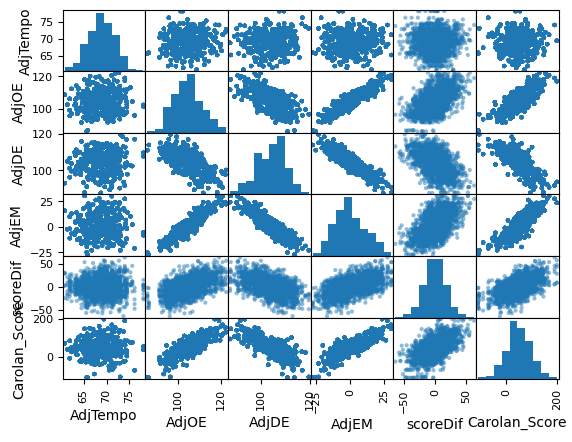

In [ ]:
pd.plotting.scatter_matrix(full_merge[['AdjTempo',
                                 'AdjOE',
                                 'AdjDE',
                                 'AdjEM',
                                 'scoreDif',
                                 'Carolan_Score']]);

In [ ]:
team_means = full_merge.groupby('School')['scoreDif'].mean()
team_means

School
Abilene Christian    -3.000000
Air Force             5.000000
Akron                 1.400000
Alabama              23.000000
Alabama A&M         -21.800000
                       ...    
Wright St.           -2.666667
Wyoming              -1.000000
Xavier                8.857143
Yale                 -1.166667
Youngstown St.      -10.250000
Name: scoreDif, Length: 362, dtype: float64

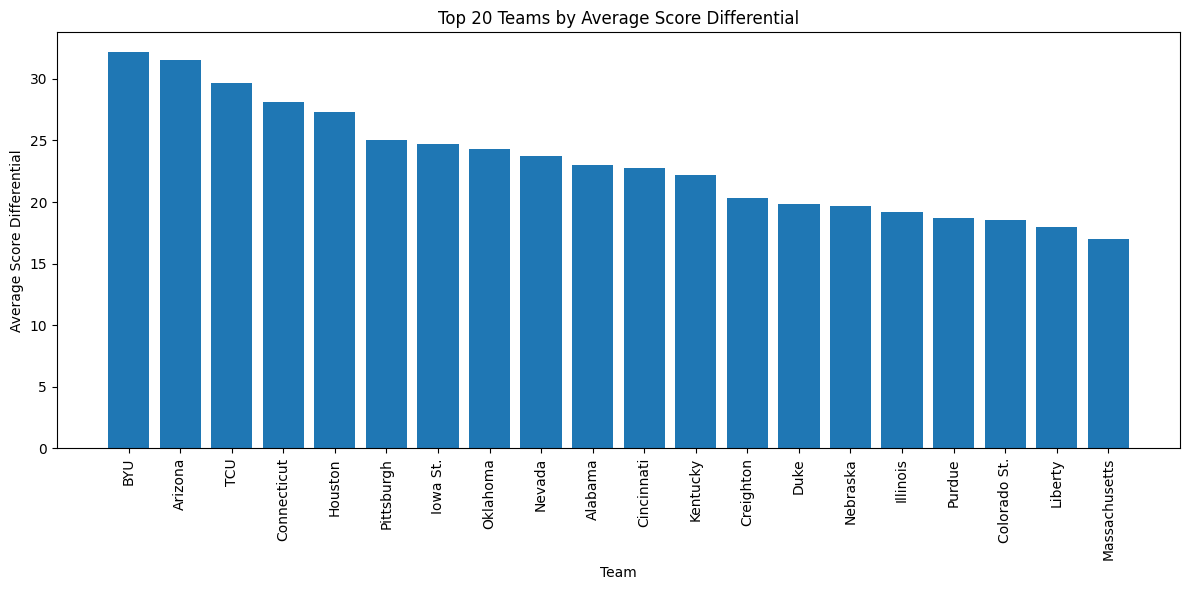

In [ ]:
top_teams = team_means.sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
plt.bar(top_teams.index, top_teams.values)
plt.xlabel('Team')
plt.ylabel('Average Score Differential')
plt.title('Top 20 Teams by Average Score Differential')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

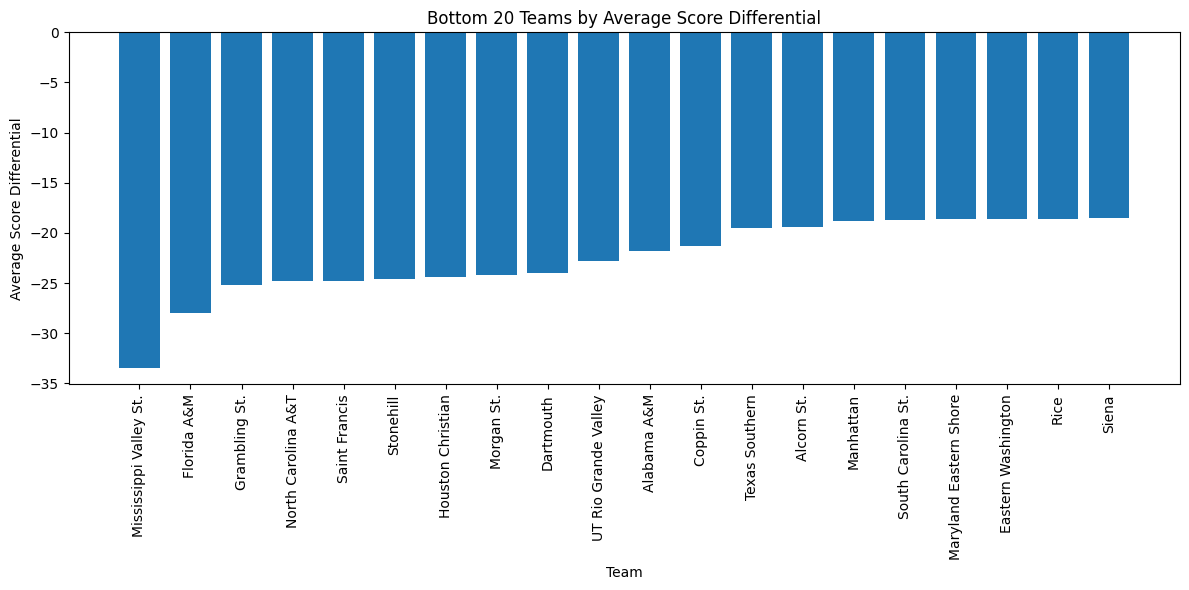

In [ ]:
not_top_teams = team_means.sort_values(ascending=True)[:20]

plt.figure(figsize=(12, 6))
plt.bar(not_top_teams.index, not_top_teams.values)
plt.xlabel('Team')
plt.ylabel('Average Score Differential')
plt.title('Bottom 20 Teams by Average Score Differential')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

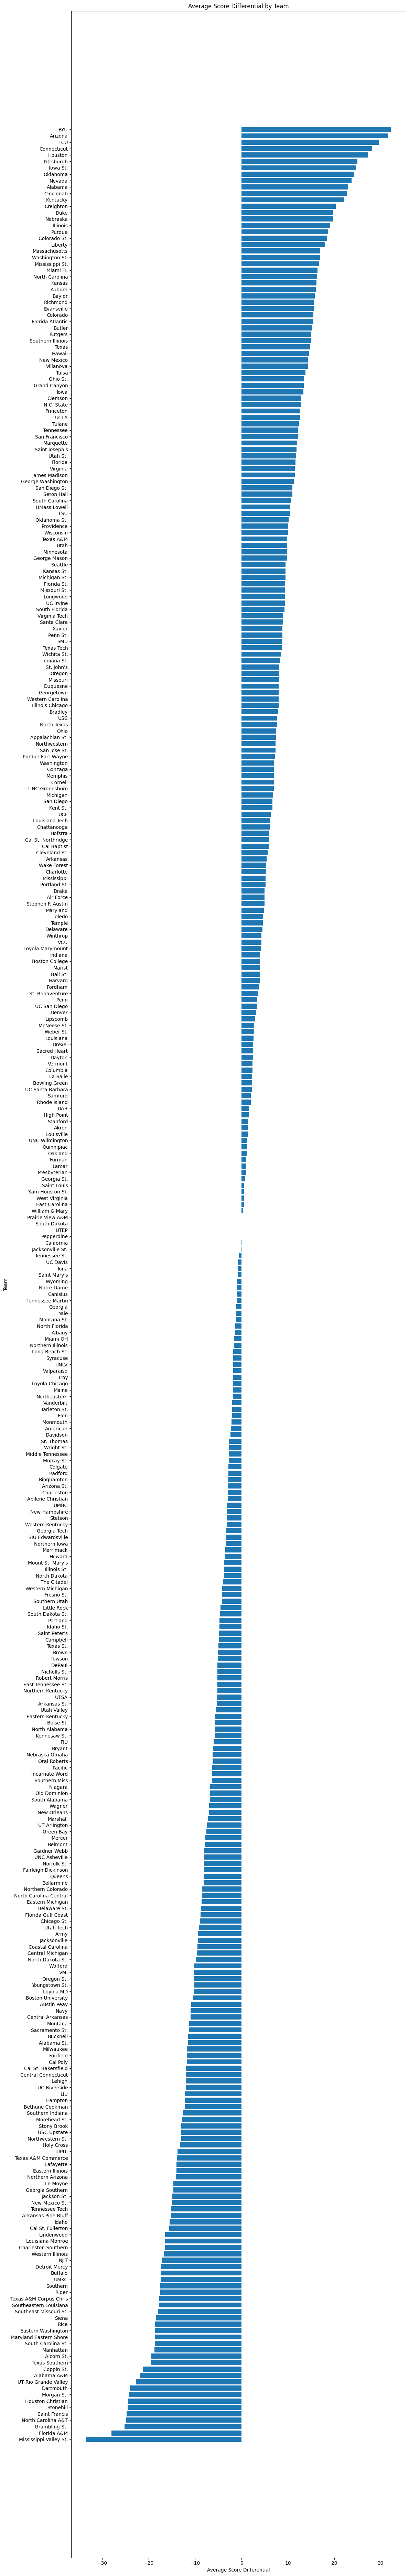

In [ ]:
teams = team_means.index
teams2 = team_means.sort_values(ascending=True)


plt.figure(figsize=(12, 75))
plt.barh(teams2.index, teams2.values)
plt.ylabel('Team')
plt.xlabel('Average Score Differential')
plt.title('Average Score Differential by Team')
plt.yticks(rotation = 360)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Score Differential based on Adjusted Offensive Efficiency')

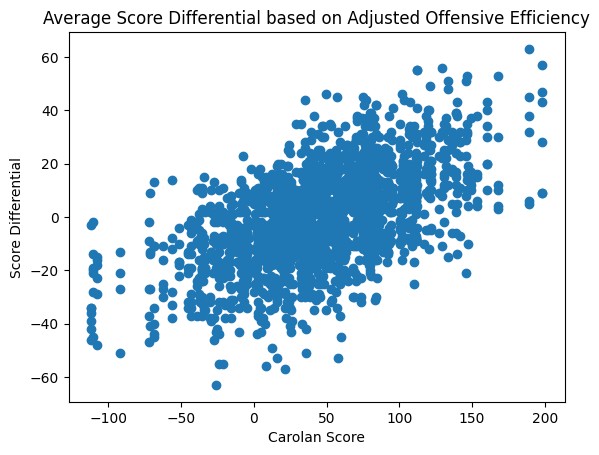

In [ ]:
plt.scatter(full_merge['Carolan_Score'], full_merge['scoreDif'])
plt.xlabel("Carolan Score")
plt.ylabel("Score Differential")
plt.title('Average Score Differential based on Adjusted Offensive Efficiency')

# Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
full_merge['teamscore'] = full_merge['teamscore'].fillna(full_merge.groupby('School')['teamscore'].transform('mean'))
full_merge['oppscore'] = full_merge['oppscore'].fillna(full_merge.groupby('School')['oppscore'].transform('mean'))
full_merge['scoreDif'] = full_merge['scoreDif'].fillna(full_merge['teamscore'] - full_merge['oppscore'])
full_merge
Final_merge = pd.merge(full_merge, Kenpom2024, left_on='opponent', right_on = 'School', how='inner')
final_byu = Final_merge[Final_merge['School_x'] == 'BYU']
final_byu['scoreDif']

0      47.000000
27      9.000000
56     57.000000
84     43.000000
111    28.000000
142     9.000000
173    32.166667
203    32.166667
233    32.166667
264    32.166667
291    32.166667
318    32.166667
346    32.166667
374    32.166667
405    32.166667
406    32.166667
435    32.166667
436    32.166667
465    32.166667
466    32.166667
496    32.166667
527    32.166667
558    32.166667
589    32.166667
620    32.166667
651    32.166667
652    32.166667
682    32.166667
683    32.166667
713    32.166667
743    32.166667
Name: scoreDif, dtype: float64

## AdjOE

In [ ]:
X = full_merge[['Carolan_Score']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Combine X_train and y_train into a single DataFrame for easier handling
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame({'scoreDif': y_train})], axis=1)

# Drop rows with NaN values in the 'scoreDif' column from the training set
train_data = train_data.dropna(subset=['scoreDif'])

# Separate the updated training set back into X_train and y_train
X_train = train_data.drop('scoreDif', axis=1)
y_train = train_data['scoreDif']


In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-9.67519
w1=0.21297


In [ ]:
reg.predict(X_test)

array([ 5.40844509, -0.17836718,  1.59385458, ...,  0.90419289,
        7.92628939, -4.87277467])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ 5.40844509 -0.17836718  1.59385458 ...  0.90419289  7.92628939
 -4.87277467]


In [ ]:
y_test_no_nan = y_test[~np.isnan(y_test)]

# Remove corresponding predictions from y_pred
y_pred_no_nan = y_pred[~np.isnan(y_test)]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred_no_nan, y_test_no_nan):.3f}')
MSE = mean_squared_error(y_pred_no_nan, y_test_no_nan)
print(f'MSE = {MSE:.3f}')
print(f'RMSE = {np.sqrt(MSE):.3f}')

MAE = 11.752
MSE = 218.941
RMSE = 14.797


In [ ]:
# Extracting features for the first five instances
X_first_five = full_merge[['Carolan_Score']].head(35).values

# Making predictions using the trained model
y_pred_first_five = reg.predict(X_first_five)

# Displaying the predicted score differentials for the first five instances
print("Predicted Score Differentials for the First Five Instances:")
print(y_pred_first_five)


Predicted Score Differentials for the First Five Instances:
[32.49609747 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747
 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747
 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747
 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747
 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747 32.49609747
 32.49609747 30.61980314 30.61980314 30.61980314 30.61980314]


In [ ]:
full_merge['School'].tail(35)

10527                Coppin St.
10528                Coppin St.
10529                Coppin St.
10530                Coppin St.
10531    Mississippi Valley St.
10532    Mississippi Valley St.
10533    Mississippi Valley St.
10534    Mississippi Valley St.
10535    Mississippi Valley St.
10536    Mississippi Valley St.
10537    Mississippi Valley St.
10538    Mississippi Valley St.
10539    Mississippi Valley St.
10540    Mississippi Valley St.
10541    Mississippi Valley St.
10542    Mississippi Valley St.
10543    Mississippi Valley St.
10544    Mississippi Valley St.
10545    Mississippi Valley St.
10546    Mississippi Valley St.
10547    Mississippi Valley St.
10548    Mississippi Valley St.
10549    Mississippi Valley St.
10550    Mississippi Valley St.
10551    Mississippi Valley St.
10552    Mississippi Valley St.
10553    Mississippi Valley St.
10554    Mississippi Valley St.
10555    Mississippi Valley St.
10556    Mississippi Valley St.
10557    Mississippi Valley St.
10558   

In [ ]:
full_merge.columns

Index(['#', 'School', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo',
       'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE',
       'RankAdjDE', 'AdjEM', 'RankAdjEM', 'Carolan_Score', 'Carolan_Rank',
       'year', 'month', 'day', 'opponent', 'location', 'teamscore', 'oppscore',
       'scoreDif'],
      dtype='object')

In [ ]:
# Filter the DataFrame for Marist vs Iona
prediction_data = full_merge[(full_merge['School'] == 'Marist') & (full_merge['opponent'] == 'Iona')]

# Extract 'Carolan_Score' for prediction
X_prediction = prediction_data[['Carolan_Score']].values

# Make predictions using the trained model
y_pred_prediction = reg.predict(X_prediction)

# Display the predicted score differential for Marist vs Iona
print("Predicted Score Differential for Marist vs Iona:")
print(y_pred_prediction)

Predicted Score Differential for Marist vs Iona:
[-2.79353706 -2.79353706]


## AdjDE

In [ ]:
X = full_merge[['AdjDE']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=158.68232
w1=-1.52269


In [ ]:
reg.predict(X_test)

array([ -7.10932285,  -5.57597743,  -5.23337294, ...,   6.17764054,
         9.77011507, -12.87725975])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -7.10932285  -5.57597743  -5.23337294 ...   6.17764054   9.77011507
 -12.87725975]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 6.946
MSE = 86.768
RMSE= 9.315


## AdjEM

In [ ]:
X = full_merge[['AdjEM']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-0.35901
w1=0.86869


In [ ]:
reg.predict(X_test)

array([ -9.73268048,  -6.20722933,  -5.07716099, ...,   5.42339937,
        12.06697358, -12.52099721])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -9.73268048  -6.20722933  -5.07716099 ...   5.42339937  12.06697358
 -12.52099721]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.923
MSE = 69.167
RMSE= 8.317


## PPG

In [ ]:
X = full_merge[['PPG']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-73.69569
w1=0.97994


In [ ]:
reg.predict(X_test)

array([ 4.89562415, -0.88603081, 10.87326741, ...,  3.13172942,
        8.61940192,  2.3477762 ])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ 4.89562415 -0.88603081 10.87326741 ...  3.13172942  8.61940192
  2.3477762 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 8.280
MSE = 113.949
RMSE= 10.675


## Carolan_Score

In [ ]:
X = full_merge[['Carolan_Score']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-9.58061
w1=0.20437


In [ ]:
reg.predict(X_test)

array([ 4.89400702, -0.46722945,  1.23343624, ...,  0.57162066,
        7.31018965, -4.97209331])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ 4.89400702 -0.46722945  1.23343624 ...  0.57162066  7.31018965
 -4.97209331]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.632
MSE = 64.840
RMSE= 8.052


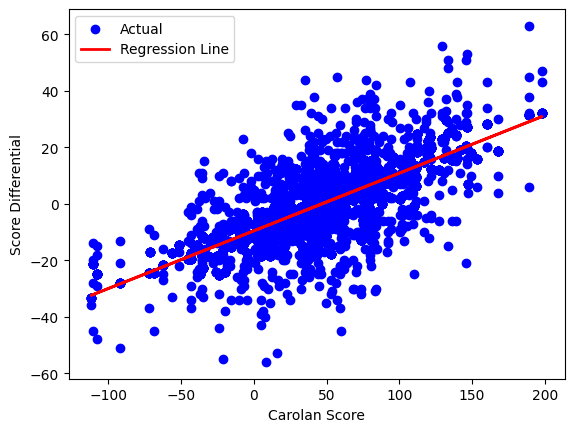

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Carolan Score')
plt.ylabel('Score Differential')
plt.legend()
plt.show()

# Multiple Linear Regression

## AdjOE and AdjDE

In [ ]:
X = full_merge[['AdjOE', 'AdjDE']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-2.41712
w1=0.87780
w2=-0.85810


In [ ]:
reg.predict(X_test)

array([ -9.74372934,  -6.20074525,  -5.06315702, ...,   5.39917535,
        12.06638603, -12.48656871])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -9.74372934  -6.20074525  -5.06315702 ...   5.39917535  12.06638603
 -12.48656871]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.924
MSE = 69.187
RMSE= 8.318


## AdjEM + AdjOE + AdjDE

In [ ]:
X = full_merge[['AdjEM', 'AdjOE', 'AdjDE']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-2.30937
w1=163.55955
w2=-162.68183
w3=162.70044


In [ ]:
reg.predict(X_test)

array([ -9.72122014,  -6.24944536,  -5.12971281, ...,   5.47553539,
        12.06616784, -12.48428001])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -9.72122014  -6.24944536  -5.12971281 ...   5.47553539  12.06616784
 -12.48428001]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.924
MSE = 69.178
RMSE= 8.317


## Carolan_Score and AdjEM

In [ ]:
X = full_merge[['Carolan_Score', 'AdjEM']].values
y = full_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-5.66364
w1=0.11750
w2=0.43970


In [ ]:
reg.predict(X_test)

array([-2.08637303, -3.38424868, -1.83448581, ...,  3.1000243 ,
       10.3369652 , -9.1700306 ])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-2.08637303 -3.38424868 -1.83448581 ...  3.1000243  10.3369652
 -9.1700306 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.196
MSE = 58.580
RMSE= 7.654


## AdjOE_x + AdjDE_ + AdjOE_y, AdjDE_y

In [ ]:
Final_merge.columns

Index(['#', 'School_x', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo_x', 'RankTempo_x', 'AdjTempo_x',
       'RankAdjTempo_x', 'OE_x', 'RankOE_x', 'AdjOE_x', 'RankAdjOE_x', 'DE_x',
       'RankDE_x', 'AdjDE_x', 'RankAdjDE_x', 'AdjEM_x', 'RankAdjEM_x',
       'Carolan_Score', 'Carolan_Rank', 'year', 'month', 'day', 'opponent',
       'location', 'teamscore', 'oppscore', 'scoreDif', 'Season', 'School_y',
       'Tempo_y', 'RankTempo_y', 'AdjTempo_y', 'RankAdjTempo_y', 'OE_y',
       'RankOE_y', 'AdjOE_y', 'RankAdjOE_y', 'DE_y', 'RankDE_y', 'AdjDE_y',
       'RankAdjDE_y', 'AdjEM_y', 'RankAdjEM_y'],
      dtype='object')

In [ ]:
X = Final_merge[['AdjOE_x', 'AdjDE_x', 'AdjOE_y', 'AdjDE_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-0.99547
w1=0.95251
w2=-0.96910
w3=-0.21504
w4=0.23962


In [ ]:
reg.predict(X_test)

array([-18.36720999, -14.75466778, -15.53884192, ...,   1.94690544,
        17.90596215,   4.86495521])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-18.36720999 -14.75466778 -15.53884192 ...   1.94690544  17.90596215
   4.86495521]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.899
MSE = 65.040
RMSE= 8.065


## AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['AdjEM_x', 'AdjEM_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-0.16118
w1=0.95999
w2=-0.22630


In [ ]:
reg.predict(X_test)

array([-18.41717091, -14.87833851, -15.37768277, ...,   1.87347111,
        17.90646895,   4.88481376])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-18.41717091 -14.87833851 -15.37768277 ...   1.87347111  17.90646895
   4.88481376]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.900
MSE = 65.058
RMSE= 8.066


## AdjEM_x + AdjEM_y + AdjOE_x + AdjDE_ + AdjOE_y, AdjDE_y

In [ ]:
X = Final_merge[['AdjEM_x', 'AdjEM_y', 'AdjOE_x', 'AdjDE_x', 'AdjOE_y', 'AdjDE_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-0.36192
w1=478.00526
w2=478.92266
w3=-477.05315
w4=477.03291
w5=-479.13762
w6=479.15949


In [ ]:
reg.predict(X_test)

array([-18.58737967, -14.54546256, -15.34859977, ...,   2.10379244,
        17.96682783,   4.76985944])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-18.58737967 -14.54546256 -15.34859977 ...   2.10379244  17.96682783
   4.76985944]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.901
MSE = 65.126
RMSE= 8.070


## Carolan_Score_X + Carolan_Score_y

In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-8.62069
w1=0.21019
w2=-0.02364


In [ ]:
reg.predict(X_test)

array([ -8.88109918, -13.10113456, -23.00021986, ...,  -1.72449234,
        20.07252982,   0.96252323])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -8.88109918 -13.10113456 -23.00021986 ...  -1.72449234  20.07252982
   0.96252323]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.772
MSE = 65.832
RMSE= 8.114


## Carolan_Score_x + Carolan_Score_y + AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=-4.80691
w1=0.11118
w2=-0.00896
w3=0.53911
w4=-0.15781


In [ ]:
reg.predict(X_test)

array([-15.03517202, -15.5196216 , -21.14402018, ...,  -0.02154833,
        20.40327477,   3.1159235 ])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-15.03517202 -15.5196216  -21.14402018 ...  -0.02154833  20.40327477
   3.1159235 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 5.295
MSE = 56.371
RMSE= 7.508


## Extra work

In [ ]:
Final_merge

Index(['#', 'School_x', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG',
       'TOV', 'PF', 'Opp MPG', 'Opp PPG', 'Opp FGM', 'Opp FGA', 'Opp FG%',
       'Opp 3PM', 'Opp 3PA', 'Opp 3P%', 'Opp FTM', 'Opp FTA', 'Opp FT%',
       'Opp ORB', 'Opp DRB', 'Opp RPG', 'Opp APG', 'Opp SPG', 'Opp BPG',
       'Opp TOV', 'Opp PF', 'Tempo_x', 'RankTempo_x', 'AdjTempo_x',
       'RankAdjTempo_x', 'OE_x', 'RankOE_x', 'AdjOE_x', 'RankAdjOE_x', 'DE_x',
       'RankDE_x', 'AdjDE_x', 'RankAdjDE_x', 'AdjEM_x', 'RankAdjEM_x',
       'Carolan_Score_x', 'Carolan_Rank_x', 'year', 'month', 'day', 'opponent',
       'location', 'teamscore', 'oppscore', 'scoreDif', 'Season', 'School_y',
       'Tempo_y', 'RankTempo_y', 'AdjTempo_y', 'RankAdjTempo_y', 'OE_y',
       'RankOE_y', 'AdjOE_y', 'RankAdjOE_y', 'DE_y', 'RankDE_y', 'AdjDE_y',
       'RankAdjDE_y', 'AdjEM_y', 'RankAdjEM_y', 'Carolan_Score_y',
       'Carolan_Rank_y'],
     

In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Combine X_train and y_train into a single DataFrame for easier handling
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame({'scoreDif': y_train})], axis=1)

# Drop rows with NaN values in the 'scoreDif' column from the training set
train_data = train_data.dropna(subset=['scoreDif'])

# Separate the updated training set back into X_train and y_train
X_train = train_data.drop('scoreDif', axis=1)
y_train = train_data['scoreDif']


In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=0.86972
w1=0.02961
w2=-0.04292
w3=0.82258
w4=-0.78019


### incorporating home and away

In [ ]:
# Perform one-hot encoding for the 'location' column
Final_merge = pd.concat([Final_merge, pd.get_dummies(Final_merge['location'], prefix='Location')], axis=1)
X = Final_merge[['Location_H', 'Location_V', 'Location_N', 'Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values
y = Final_merge['scoreDif'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Combine X_train and y_train into a single DataFrame for easier handling
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame({'scoreDif': y_train})], axis=1)

# Drop rows with NaN values in the 'scoreDif' column from the training set
train_data = train_data.dropna(subset=['scoreDif'])

# Separate the updated training set back into X_train and y_train
X_train = train_data.drop('scoreDif', axis=1)
y_train = train_data['scoreDif']


In [ ]:
# For comparison, this was the exact result:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'intercept={reg.intercept_:.5f}')
for i in range(len(reg.coef_)):
  print(f'w{i+1}={reg.coef_[i]:.5f}')

intercept=0.93840
w1=2.02154
w2=-2.06531
w3=0.04377
w4=0.02944
w5=-0.04432
w6=0.75897
w7=-0.70996


In [ ]:
reg.predict(X_test)

array([-11.12183347, -19.94833232, -29.2107152 , ...,  -6.35247353,
         7.059302  ,   6.10804401])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-11.12183347 -19.94833232 -29.2107152  ...  -6.35247353   7.059302
   6.10804401]


In [ ]:
y_test_no_nan = y_test[~np.isnan(y_test)]

# Remove corresponding predictions from y_pred
y_pred_no_nan = y_pred[~np.isnan(y_test)]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred_no_nan, y_test_no_nan):.3f}')
MSE = mean_squared_error(y_pred_no_nan, y_test_no_nan)
print(f'MSE = {MSE:.3f}')
print(f'RMSE = {np.sqrt(MSE):.3f}')

MAE = 7.617
MSE = 92.907
RMSE = 9.639


In [ ]:
# Extracting features for the first five instances
X_first_five = Final_merge[['Location_H', 'Location_V', 'Location_N', 'Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].head(35).values

# Making predictions using the trained model
y_pred_first_five = reg.predict(X_first_five)

# Displaying the predicted score differentials for the first five instances
print("Predicted Score Differentials for the First Five Instances:")
print(y_pred_first_five)


Predicted Score Differentials for the First Five Instances:
[44.93856565 38.887145   38.34312846 40.43582119 26.13698901 30.22383881
 29.49018651 29.6553567  11.38516863 15.47201843 14.08431154  9.99746174
 11.29055773  7.20370792 12.9582046  17.04505441 18.05440655 11.39544418
 15.48229398  8.67305139 10.46666971 14.55351951 13.40890164 13.00018891
  8.9133391   8.82153884  4.73468903  8.57984885  7.26545434 -6.69088982
 -2.60404002 -3.97119494  0.11565486  2.15851565 -1.92833415]


In [ ]:
# Filter the DataFrame for Marist vs Iona
prediction_data = Final_merge[(Final_merge['School_x'] == 'Marist') & (Final_merge['School_y'] == 'Iona')]

# Extract 'Carolan_Score' for prediction
X_prediction = prediction_data[['Location_H', 'Location_V', 'Location_N', 'Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_prediction = reg.predict(X_prediction)

# Display the predicted score differential for Marist vs Iona
print("Predicted Score Differential for Marist vs Iona:")
print(y_pred_prediction)

Predicted Score Differential for Marist vs Iona:
[-5.03145435 -0.94460455]


In [ ]:
# Filter the DataFrame for instances where School_x is 'Marist'
marist_data = Final_merge[Final_merge['School_x'] == 'San Francisco']

# Extract features for prediction
X_marist = marist_data[['Location_H', 'Location_V', 'Location_N', 'Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_marist = reg.predict(X_marist)

# Display the predicted score differentials for instances where School_x is 'Marist'
print("Predicted Score Differentials for instances where School_x is 'Marist':")
print(y_pred_marist)

Predicted Score Differentials for instances where School_x is 'Marist':
[  5.9646053   13.35853801 -12.75107561  -8.66422581   7.20747362
  19.24970894  39.14177154  13.95542085   2.20776706   9.12278901
  13.20963882  11.62636319  15.713213     8.08338118   3.99653138
  15.88396481  19.97081462   7.2332021    3.14635229   1.887103
  -2.19974681  13.846228     9.75937819   9.25870629  13.80138388
   2.91192871  32.78723902  21.00555461   9.36907194  -1.07036693]


In [ ]:
# Filter the DataFrame for instances where School_x is 'Marist'
marist_data = Final_merge[Final_merge['School_x'] == 'Marist']

# Extract features for prediction
X_marist = marist_data[['Location_H', 'Location_V', 'Location_N', 'Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_marist = reg.predict(X_marist)

# Create a new DataFrame with School_x, School_y, and predicted score differential
result_df = pd.DataFrame({
    'School_x': marist_data['School_x'],
    'School_y': marist_data['School_y'],
    #'Day': Final_merge['day']
    'Predicted_ScoreDif': y_pred_marist
})

result_df['Outcome'] = np.where(result_df['Predicted_ScoreDif'] > 0, 'Win', 'Loss')

# Display the new DataFrame
print(result_df)

      School_x                School_y  Predicted_ScoreDif Outcome
2082    Marist               Manhattan           10.844925     Win
2083    Marist               Manhattan            6.758075     Win
2122    Marist           New Hampshire           -3.124808    Loss
2792    Marist  Maryland Eastern Shore           14.345303     Win
4245    Marist              Notre Dame           -4.291203    Loss
4923    Marist                    Iona           -5.031454    Loss
4924    Marist                    Iona           -0.944605    Loss
5080    Marist              Binghamton           -1.611402    Loss
5157    Marist                Canisius           -4.774836    Loss
5158    Marist                Canisius           -0.687986    Loss
5744    Marist                  Lehigh            3.858183     Win
6444    Marist                   Rider            4.538161     Win
6445    Marist                   Rider            0.451311     Win
7088    Marist               Dartmouth            4.236268    

In [ ]:
# Count the occurrences of 'Win' and 'Loss'
outcome_counts = result_df['Outcome'].value_counts()

# Display the counts
print("Marist Predicted Record:")
print(outcome_counts)

# Calculate and display the predicted record in the format "wins-losses"
predicted_record = f"{outcome_counts.get('Win', 0)}-{outcome_counts.get('Loss', 0)}"
print(f" Marist Predicted Record: {predicted_record}")

Marist Predicted Record:
Win     19
Loss    10
Name: Outcome, dtype: int64
 Marist Predicted Record: 19-10


In [ ]:
reg.predict(X_test)

array([-11.12183347, -19.94833232, -29.2107152 , ...,  -6.35247353,
         7.059302  ,   6.10804401])

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[ -9.96279542 -19.32309609 -29.09314161 ...  -4.59761132   9.67885297
   4.27399317]


In [ ]:
y_test_no_nan = y_test[~np.isnan(y_test)]

# Remove corresponding predictions from y_pred
y_pred_no_nan = y_pred[~np.isnan(y_test)]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(y_pred_no_nan, y_test_no_nan):.3f}')
MSE = mean_squared_error(y_pred_no_nan, y_test_no_nan)
print(f'MSE = {MSE:.3f}')
print(f'RMSE = {np.sqrt(MSE):.3f}')

MAE = 7.761
MSE = 95.866
RMSE = 9.791


In [ ]:
# Extracting features for the first five instances
X_first_five = Final_merge[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].head(35).values

# Making predictions using the trained model
y_pred_first_five = reg.predict(X_first_five)

# Displaying the predicted score differentials for the first five instances
print("Predicted Score Differentials for the First Five Instances:")
print(y_pred_first_five)


Predicted Score Differentials for the First Five Instances:
[ 4.57734307e+01  3.93654869e+01  3.88105873e+01  4.10956584e+01
  3.00461700e+01  3.00461700e+01  2.93005701e+01  2.94853862e+01
  1.41518327e+01  1.41518327e+01  1.26656211e+01  1.26656211e+01
  9.70731518e+00  9.70731518e+00  1.59465432e+01  1.59465432e+01
  1.70787324e+01  1.42949119e+01  1.42949119e+01  1.13452046e+01
  1.32953910e+01  1.32953910e+01  1.64951387e+01  1.16270100e+01
  1.16270100e+01  7.10979989e+00  7.10979989e+00  6.75467990e+00
  5.44570305e+00 -5.20455750e+00 -5.20455750e+00 -2.24242697e+00
 -2.24242697e+00 -8.40372166e-03 -8.40372166e-03]


In [ ]:
# Filter the DataFrame for Marist vs Iona
prediction_data = Final_merge[(Final_merge['School_x'] == 'Iona') & (Final_merge['School_y'] == 'Marist')]

# Extract 'Carolan_Score' for prediction
X_prediction = prediction_data[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_prediction = reg.predict(X_prediction)

# Display the predicted score differential for Marist vs Iona
print("Predicted Score Differential for Marist vs Iona:")
print(y_pred_prediction)

Predicted Score Differential for Marist vs Iona:
[4.03991986 4.03991986]


In [ ]:
# Filter the DataFrame for instances where School_x is 'Marist'
marist_data = Final_merge[Final_merge['School_x'] == 'Marist']

# Extract features for prediction
X_marist = marist_data[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_marist = reg.predict(X_marist)

# Display the predicted score differentials for instances where School_x is 'Marist'
print("Predicted Score Differentials for instances where School_x is 'Marist':")
print(y_pred_marist)

Predicted Score Differentials for instances where School_x is 'Marist':
[ 9.33731669  9.33731669 -1.02493809 13.1513245  -2.52467014 -3.30842999
 -3.30842999  0.57076178 -2.8177602  -2.8177602   1.89924439  2.63445616
  2.63445616  6.62347787 10.43420835  1.57861531  1.57861531  2.15760363
 -0.07217114 -0.07217114  5.13191813  5.13191813 13.59256497 13.59256497
  9.4419961   3.30024237  3.30024237  5.2417317   5.2417317 ]


In [ ]:
# Filter the DataFrame for instances where School_x is 'Marist'
marist_data = Final_merge[Final_merge['School_x'] == 'Duke']

# Extract features for prediction
X_marist = marist_data[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']].values

# Make predictions using the trained model
y_pred_marist = reg.predict(X_marist)

# Create a new DataFrame with School_x, School_y, and predicted score differential
result_df = pd.DataFrame({
    'School_x': marist_data['School_x'],
    'School_y': marist_data['School_y'],
    'Predicted_ScoreDif': y_pred_marist
})

result_df['Outcome'] = np.where(result_df['Predicted_ScoreDif'] > 0, 'Win', 'Loss')

# Display the new DataFrame
print(result_df)

     School_x          School_y  Predicted_ScoreDif Outcome
147      Duke        N.C. State           13.608933     Win
415      Duke            Baylor           -1.882612    Loss
896      Duke      Michigan St.            3.922439     Win
1624     Duke           Arizona           -5.849032    Loss
2134     Duke    North Carolina           -0.026866    Loss
2135     Duke    North Carolina           -0.026866    Loss
2667     Duke         Charlotte           18.631624     Win
3179     Duke          Syracuse           16.361458     Win
4221     Duke        Notre Dame           23.929926     Win
4222     Duke        Notre Dame           23.929926     Win
4313     Duke     Virginia Tech           12.423586     Win
4461     Duke          Arkansas            9.761682     Win
4884     Duke       Florida St.           12.640252     Win
4947     Duke          Miami FL            7.762508     Win
5124     Duke           Clemson            5.607280     Win
5240     Duke        Louisville         

In [ ]:
# Count the occurrences of 'Win' and 'Loss'
outcome_counts = result_df['Outcome'].value_counts()

# Display the counts
print("Predicted Record:")
print(outcome_counts)

# Calculate and display the predicted record in the format "wins-losses"
predicted_record = f"{outcome_counts.get('Win', 0)}-{outcome_counts.get('Loss', 0)}"
print(f"Predicted Record: {predicted_record}")

Predicted Record:
Win     27
Loss     4
Name: Outcome, dtype: int64
Predicted Record: 27-4


# Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## AdjOE + AdjDE

In [ ]:
X = full_merge[['AdjOE', 'AdjDE']]
y = full_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
AdjOE    0.000677
AdjDE   -0.000661
dtype: float64 

R2 train: 0.000
MSE train: 166.356,MSE test:170.326
MAE train: 10.162,MAE test:10.200


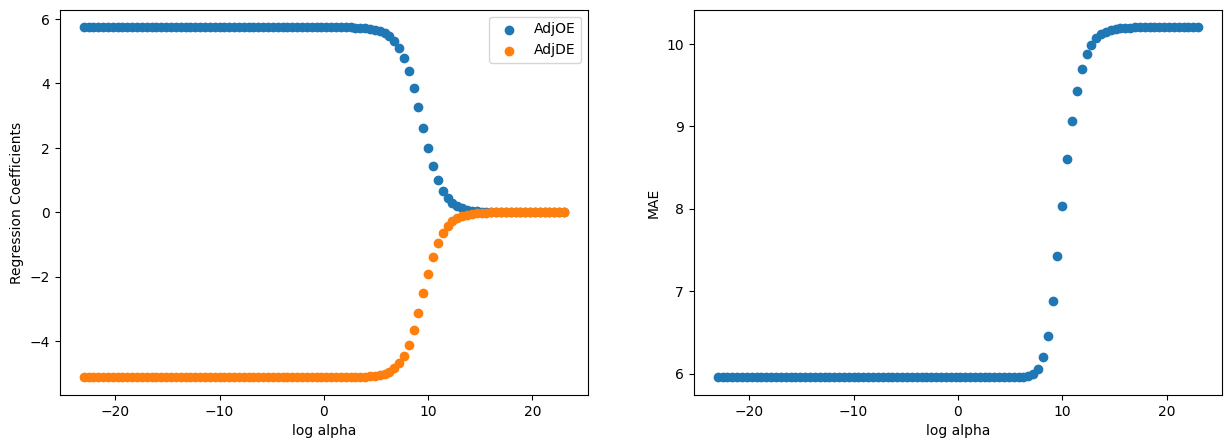

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE = []
AdjDE = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    AdjOE += [pipeline.steps[1][1].coef_[0]]
    AdjDE += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE':AdjOE,'AdjDE':AdjDE, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE', data=plotdata[['log_alpha', 'AdjOE']]);
axes[0].scatter(x='log_alpha', y='AdjDE', data=plotdata[['log_alpha', 'AdjDE']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  8.111308
Intercept (b) -0.113649
AdjOE    5.736502
AdjDE   -5.118496
dtype: float64 

R2 train: 0.591
MSE train: 67.995,MSE test:71.252
MAE train: 5.865,MAE test:5.959


## AdjOE + AdjDE + AdjEM

In [ ]:
X = full_merge[['AdjOE', 'AdjDE', 'AdjEM']]
y = full_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
AdjOE    0.000677
AdjDE   -0.000661
AdjEM    0.000733
dtype: float64 

R2 train: 0.000
MSE train: 166.341,MSE test:170.312
MAE train: 10.161,MAE test:10.199


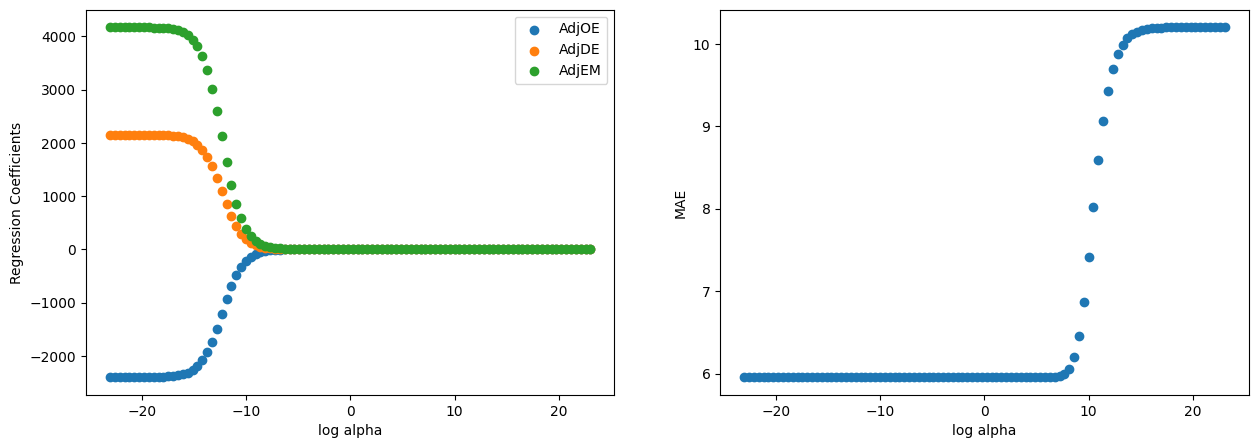

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE = []
AdjDE = []
AdjEM = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    AdjOE += [pipeline.steps[1][1].coef_[0]]
    AdjDE += [pipeline.steps[1][1].coef_[1]]
    AdjEM += [pipeline.steps[1][1].coef_[2]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE':AdjOE,'AdjDE':AdjDE, 'AdjEM':AdjEM, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE', data=plotdata[['log_alpha', 'AdjOE']]);
axes[0].scatter(x='log_alpha', y='AdjDE', data=plotdata[['log_alpha', 'AdjDE']]);
axes[0].scatter(x='log_alpha', y='AdjEM', data=plotdata[['log_alpha', 'AdjEM']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

I have no clue why this is giving me crazy results, but i thought it would be interesting to leave in

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.000004
Intercept (b) -0.113649
AdjOE   -1218.123496
AdjDE    1092.583283
AdjEM    2119.909639
dtype: float64 

R2 train: 0.591
MSE train: 67.982,MSE test:71.260
MAE train: 5.864,MAE test:5.960


## Carolan_Score + AdjEM

In [ ]:
X = full_merge[['Carolan_Score', 'AdjEM']]
y = full_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
Carolan_Score    0.000743
AdjEM            0.000733
dtype: float64 

R2 train: 0.000
MSE train: 166.350,MSE test:170.321
MAE train: 10.162,MAE test:10.200


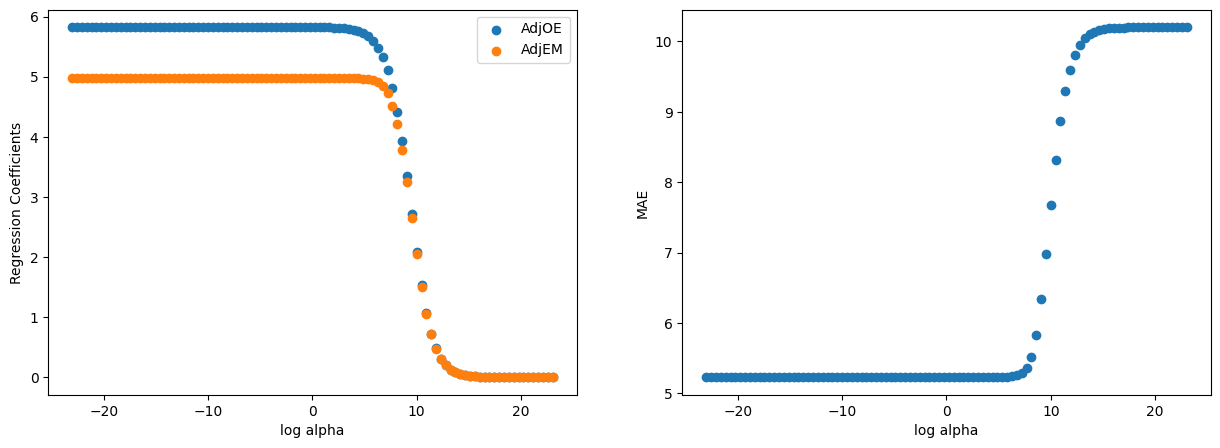

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE = []
AdjEM = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    AdjOE += [pipeline.steps[1][1].coef_[0]]
    AdjEM += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE':AdjOE,'AdjEM':AdjEM, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE', data=plotdata[['log_alpha', 'AdjOE']]);
axes[0].scatter(x='log_alpha', y='AdjEM', data=plotdata[['log_alpha', 'AdjEM']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  12.915497
Intercept (b) -0.113649
Carolan_Score    5.812142
AdjEM            4.972126
dtype: float64 

R2 train: 0.648
MSE train: 58.567,MSE test:60.288
MAE train: 5.202,MAE test:5.230


## AdjOE_x + AdjDE_ + AdjOE_y, AdjDE_y

In [ ]:
X = Final_merge[['AdjOE_x', 'AdjDE_x', 'AdjOE_y', 'AdjDE_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjOE_x    0.000672
AdjDE_x   -0.000659
AdjOE_y    0.000138
AdjDE_y   -0.000154
dtype: float64 

R2 train: 0.000
MSE train: 166.082,MSE test:170.937
MAE train: 10.166,MAE test:10.193


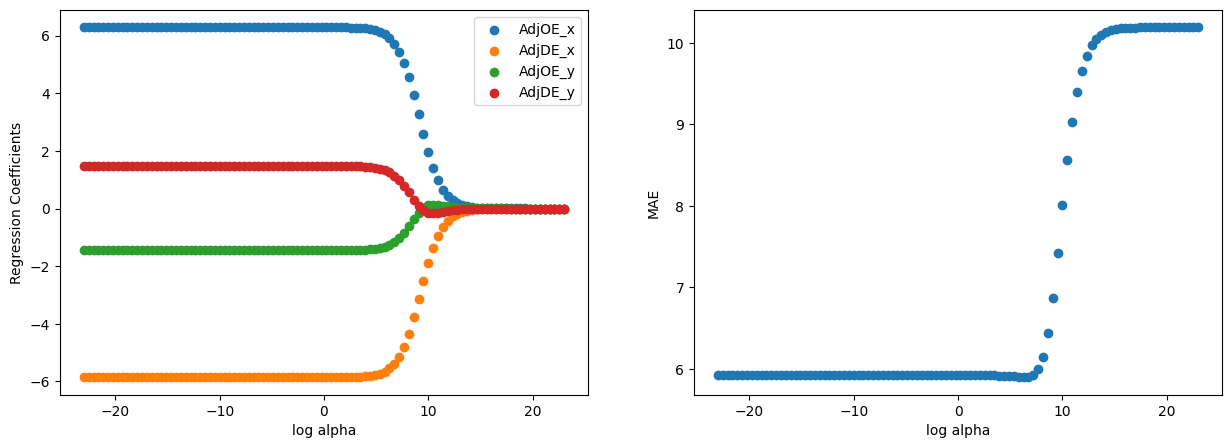

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE_x = []
AdjDE_x = []
AdjOE_y = []
AdjDE_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    AdjOE_x += [pipeline.steps[1][1].coef_[0]]
    AdjDE_x += [pipeline.steps[1][1].coef_[1]]
    AdjOE_y += [pipeline.steps[1][1].coef_[2]]
    AdjDE_y += [pipeline.steps[1][1].coef_[3]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE_x':AdjOE_x,'AdjDE_x':AdjDE_x, 'AdjOE_y':AdjOE_y, 'AdjDE_y':AdjDE_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE_x', data=plotdata[['log_alpha', 'AdjOE_x']]);
axes[0].scatter(x='log_alpha', y='AdjDE_x', data=plotdata[['log_alpha', 'AdjDE_x']]);
axes[0].scatter(x='log_alpha', y='AdjOE_y', data=plotdata[['log_alpha', 'AdjOE_y']]);
axes[0].scatter(x='log_alpha', y='AdjDE_y', data=plotdata[['log_alpha', 'AdjDE_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  8.111308
Intercept (b) -0.030176
AdjOE_x    6.284498
AdjDE_x   -5.849518
AdjOE_y   -1.449668
AdjDE_y    1.470281
dtype: float64 

R2 train: 0.624
MSE train: 62.508,MSE test:65.083
MAE train: 5.817,MAE test:5.919


## AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['AdjEM_x', 'AdjEM_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjEM_x    0.000731
AdjEM_y    0.000160
dtype: float64 

R2 train: 0.000
MSE train: 166.092,MSE test:170.948
MAE train: 10.167,MAE test:10.194


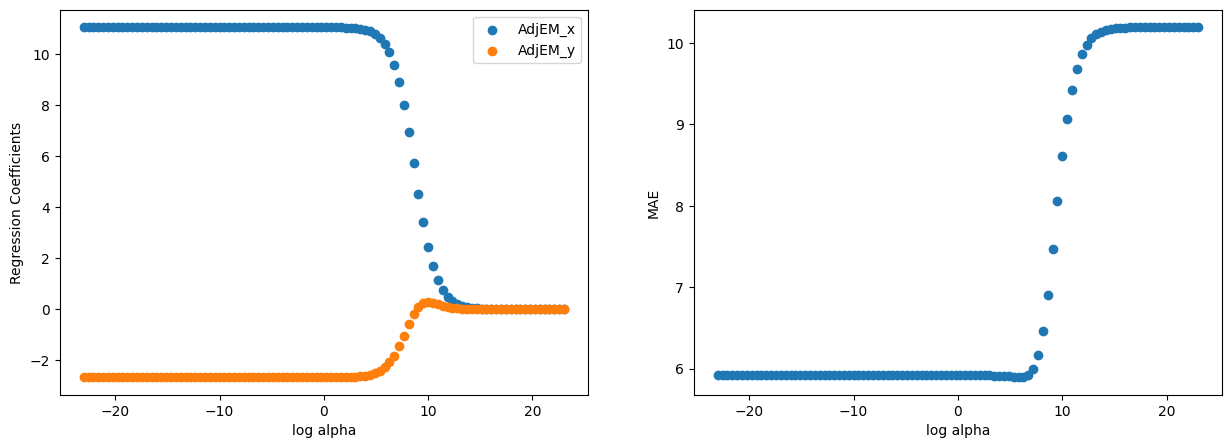

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjEM_x = []
AdjEM_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    AdjEM_x += [pipeline.steps[1][1].coef_[0]]
    AdjEM_y += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjEM_x':AdjEM_x,'AdjEM_y':AdjEM_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjEM_x', data=plotdata[['log_alpha', 'AdjEM_x']]);
axes[0].scatter(x='log_alpha', y='AdjEM_y', data=plotdata[['log_alpha', 'AdjEM_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.792483
Intercept (b) -0.030176
AdjEM_x    11.052118
AdjEM_y    -2.661808
dtype: float64 

R2 train: 0.624
MSE train: 62.522,MSE test:65.105
MAE train: 5.819,MAE test:5.920


## Carolan_Score_X + Carolan_Score_y

## Carolan_Score_x + Carolan_Score_y + AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']]
y = Final_merge['scoreDif']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Combine X_train and y_train into a single DataFrame for easier handling
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame({'scoreDif': y_train})], axis=1)

# Drop rows with NaN values in the 'scoreDif' column from the training set
train_data = train_data.dropna(subset=['scoreDif'])

# Separate the updated training set back into X_train and y_train
X_train = train_data.drop('scoreDif', axis=1)
y_train = train_data['scoreDif']


In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test_no_nan = y_test[~np.isnan(y_test)]

# Remove corresponding predictions from y_pred
y_pred_no_nan = y_pred[~np.isnan(y_test)]

In [ ]:
non_nan_indices = ~np.isnan(y_test) & ~np.isnan(y_test_pred)
y_test = y_test[non_nan_indices]
y_test_pred = y_test_pred[non_nan_indices]

# Calculate the MSE and MAE for the test set
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE test: {MSE_test:.3f}')
MAE_train = mean_absolute_error(y_train, y_train_pred)
print(f'MAE test: {MAE_test:.3f}')
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) 0.510806
Carolan_Score_x    0.000104
Carolan_Score_y   -0.000104
AdjEM_x            0.000102
AdjEM_y           -0.000101
dtype: float64 

MSE test: 330.236
MAE test: 14.291
R2 train: 0.000
MSE train: 307.194,MSE test:330.236
MAE train: 13.916,MAE test:14.291


In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
Carolan_Score_x = []
Carolan_Score_y = []
AdjEM_x = []
AdjEM_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    Carolan_Score_x += [pipeline.steps[1][1].coef_[0]]
    Carolan_Score_y += [pipeline.steps[1][1].coef_[1]]
    AdjEM_x += [pipeline.steps[1][1].coef_[2]]
    AdjEM_y += [pipeline.steps[1][1].coef_[3]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'Carolan_Score_x':Carolan_Score_x,'Carolan_Score_y':Carolan_Score_y, 'AdjEM_x':AdjEM_x, 'AdjEM_y':AdjEM_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_x', data=plotdata[['log_alpha', 'Carolan_Score_x']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_y', data=plotdata[['log_alpha', 'Carolan_Score_y']]);
axes[0].scatter(x='log_alpha', y='AdjEM_x', data=plotdata[['log_alpha', 'AdjEM_x']]);
axes[0].scatter(x='log_alpha', y='AdjEM_y', data=plotdata[['log_alpha', 'AdjEM_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

ValueError: ignored

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  12.915497
Intercept (b) -0.030176
Carolan_Score_x    5.544466
Carolan_Score_y   -0.385828
AdjEM_x            6.139510
AdjEM_y           -1.926175
dtype: float64 

R2 train: 0.674
MSE train: 54.069,MSE test:56.597
MAE train: 5.243,MAE test:5.327


In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100000000))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
Carolan_Score_x    0.000744
Carolan_Score_y    0.000092
dtype: float64 

R2 train: 0.000
MSE train: 166.092,MSE test:170.948
MAE train: 10.167,MAE test:10.194


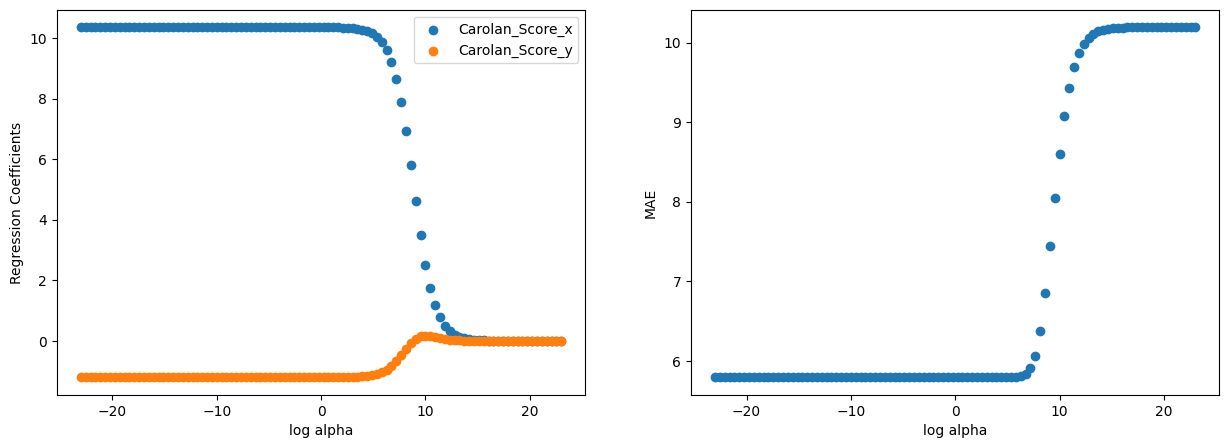

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
Carolan_Score_x = []
Carolan_Score_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=a))
    pipeline.fit(X_train, y_train)
    Carolan_Score_x += [pipeline.steps[1][1].coef_[0]]
    Carolan_Score_y += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'Carolan_Score_x':Carolan_Score_x,'Carolan_Score_y':Carolan_Score_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_x', data=plotdata[['log_alpha', 'Carolan_Score_x']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_y', data=plotdata[['log_alpha', 'Carolan_Score_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use RidgeCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  1.261857
Intercept (b) -0.030176
Carolan_Score_x    10.351149
Carolan_Score_y    -1.200709
dtype: float64 

R2 train: 0.619
MSE train: 63.364,MSE test:66.441
MAE train: 5.716,MAE test:5.799


# Lasso Regression

## AdjOE + AdjDE

In [ ]:
X = full_merge[['AdjOE', 'AdjDE']]
y = full_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
AdjOE    5.740948
AdjDE   -5.120148
dtype: float64 

R2 train: 0.591
MSE train: 67.995,MSE test:71.252
MAE train: 5.866,MAE test:5.959


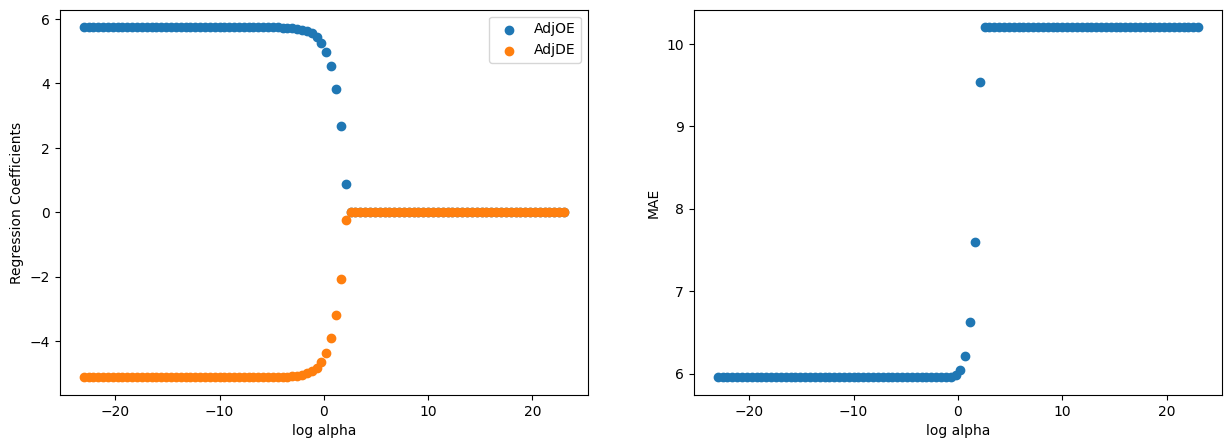

In [ ]:
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE = []
AdjDE = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    AdjOE += [pipeline.steps[1][1].coef_[0]]
    AdjDE += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE':AdjOE,'AdjDE':AdjDE, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE', data=plotdata[['log_alpha', 'AdjOE']]);
axes[0].scatter(x='log_alpha', y='AdjDE', data=plotdata[['log_alpha', 'AdjDE']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.000000
Intercept (b) -0.113649
AdjOE    5.741092
AdjDE   -5.121052
dtype: float64 

R2 train: 0.591
MSE train: 67.995,MSE test:71.252
MAE train: 5.866,MAE test:5.959


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
AdjOE    5.710595
AdjDE   -5.102664
dtype: float64 

R2 train: 0.591
MSE train: 67.997,MSE test:71.256
MAE train: 5.864,MAE test:5.958


## Carolan_Score + AdjEM

In [ ]:
X = full_merge[['Carolan_Score', 'AdjEM']]
y = full_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
Carolan_Score    5.740948
AdjEM           -5.120148
dtype: float64 

R2 train: 0.591
MSE train: 67.995,MSE test:71.252
MAE train: 5.866,MAE test:5.959


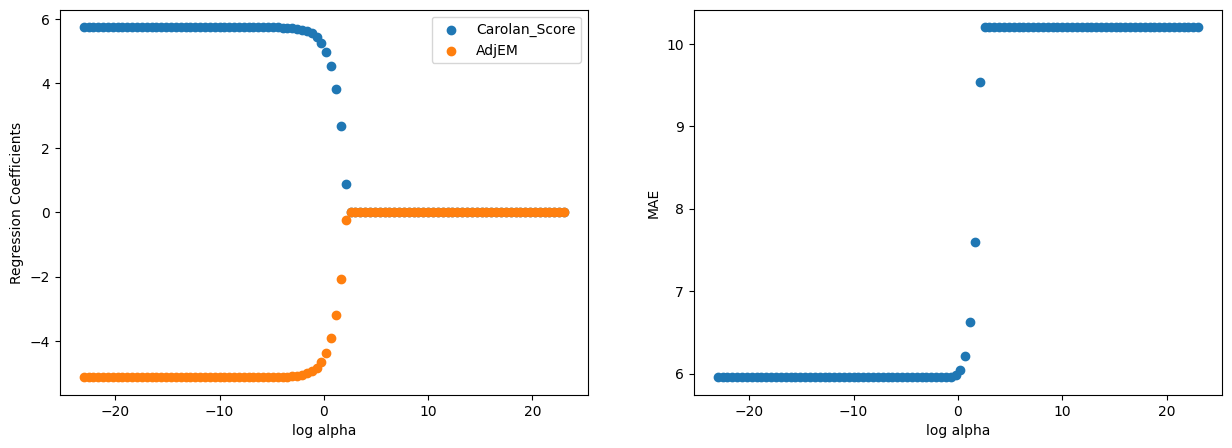

In [ ]:
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
Carolan_Score = []
AdjEM = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    Carolan_Score += [pipeline.steps[1][1].coef_[0]]
    AdjEM += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'Carolan_Score':Carolan_Score,'AdjEM':AdjEM, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score', data=plotdata[['log_alpha', 'Carolan_Score']]);
axes[0].scatter(x='log_alpha', y='AdjEM', data=plotdata[['log_alpha', 'AdjEM']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.000000
Intercept (b) -0.113649
Carolan_Score    5.741092
AdjEM           -5.121052
dtype: float64 

R2 train: 0.591
MSE train: 67.995,MSE test:71.252
MAE train: 5.866,MAE test:5.959


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.113649
Carolan_Score    5.710595
AdjEM           -5.102664
dtype: float64 

R2 train: 0.591
MSE train: 67.997,MSE test:71.256
MAE train: 5.864,MAE test:5.958


## AdjOE_x + AdjDE_ + AdjOE_y, AdjDE_y

In [ ]:
X = Final_merge[['AdjOE_x', 'AdjDE_x', 'AdjOE_y', 'AdjDE_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjOE_x    6.289565
AdjDE_x   -5.853286
AdjOE_y   -1.451673
AdjDE_y    1.472843
dtype: float64 

R2 train: 0.624
MSE train: 62.508,MSE test:65.082
MAE train: 5.818,MAE test:5.920


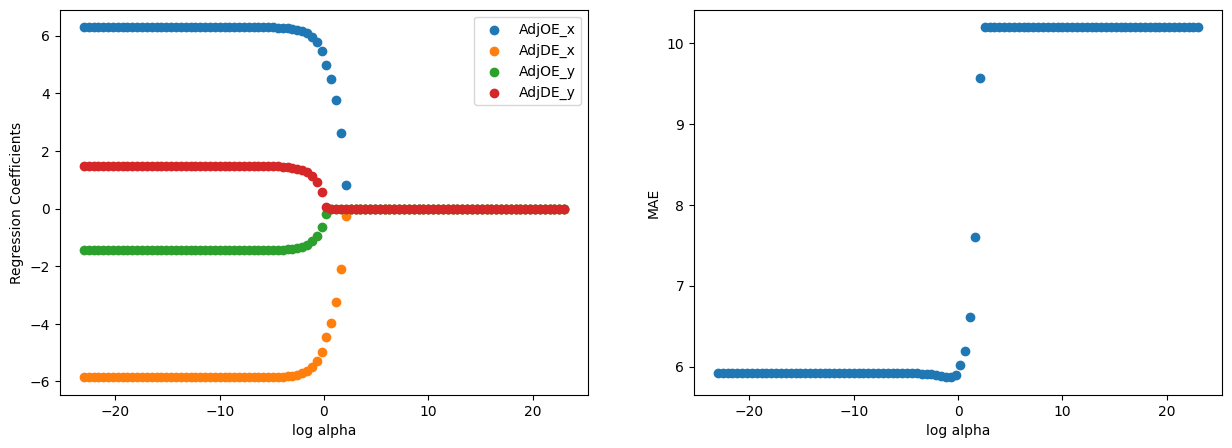

In [ ]:
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjOE_x = []
AdjDE_x = []
AdjOE_y = []
AdjDE_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    AdjOE_x += [pipeline.steps[1][1].coef_[0]]
    AdjDE_x += [pipeline.steps[1][1].coef_[1]]
    AdjOE_y += [pipeline.steps[1][1].coef_[2]]
    AdjDE_y += [pipeline.steps[1][1].coef_[3]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjOE_x':AdjOE_x,'AdjDE_x':AdjDE_x, 'AdjOE_y':AdjOE_y,'AdjDE_y':AdjDE_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjOE_x', data=plotdata[['log_alpha', 'AdjOE_x']]);
axes[0].scatter(x='log_alpha', y='AdjDE_x', data=plotdata[['log_alpha', 'AdjDE_x']]);
axes[0].scatter(x='log_alpha', y='AdjOE_y', data=plotdata[['log_alpha', 'AdjOE_y']]);
axes[0].scatter(x='log_alpha', y='AdjDE_y', data=plotdata[['log_alpha', 'AdjDE_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.001000
Intercept (b) -0.030176
AdjOE_x    6.289565
AdjDE_x   -5.853286
AdjOE_y   -1.451673
AdjDE_y    1.472843
dtype: float64 

R2 train: 0.624
MSE train: 62.508,MSE test:65.082
MAE train: 5.818,MAE test:5.920


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjOE_x    6.248969
AdjDE_x   -5.819957
AdjOE_y   -1.430293
AdjDE_y    1.447420
dtype: float64 

R2 train: 0.624
MSE train: 62.512,MSE test:65.093
MAE train: 5.813,MAE test:5.916


## AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['AdjEM_x', 'AdjEM_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjEM_x    11.05195
AdjEM_y    -2.66102
dtype: float64 

R2 train: 0.624
MSE train: 62.522,MSE test:65.105
MAE train: 5.819,MAE test:5.920


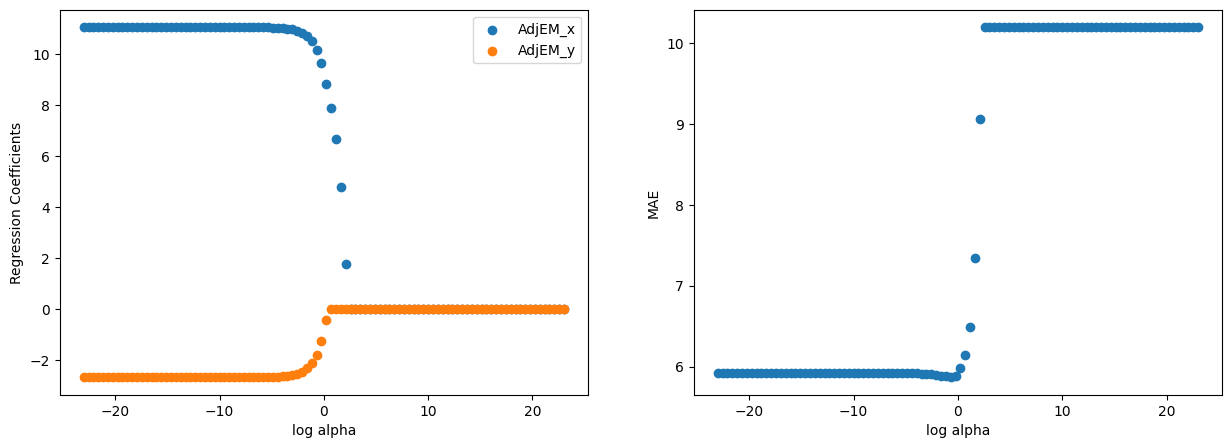

In [ ]:
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
AdjEM_x = []
AdjEM_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    AdjEM_x += [pipeline.steps[1][1].coef_[0]]
    AdjEM_y += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'AdjEM_x':AdjEM_x,'AdjEM_y':AdjEM_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='AdjEM_x', data=plotdata[['log_alpha', 'AdjEM_x']]);
axes[0].scatter(x='log_alpha', y='AdjEM_y', data=plotdata[['log_alpha', 'AdjEM_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.001000
Intercept (b) -0.030176
AdjEM_x    11.05195
AdjEM_y    -2.66102
dtype: float64 

R2 train: 0.624
MSE train: 62.522,MSE test:65.105
MAE train: 5.819,MAE test:5.920


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
AdjEM_x    10.943944
AdjEM_y    -2.593728
dtype: float64 

R2 train: 0.624
MSE train: 62.532,MSE test:65.127
MAE train: 5.812,MAE test:5.913


## Carolan_Score_x + Carolan_Score_y

In [ ]:
X = Final_merge[['Carolan_Score_x', 'Carolan_Score_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
Carolan_Score_x    10.351759
Carolan_Score_y    -1.200059
dtype: float64 

R2 train: 0.619
MSE train: 63.364,MSE test:66.441
MAE train: 5.716,MAE test:5.799


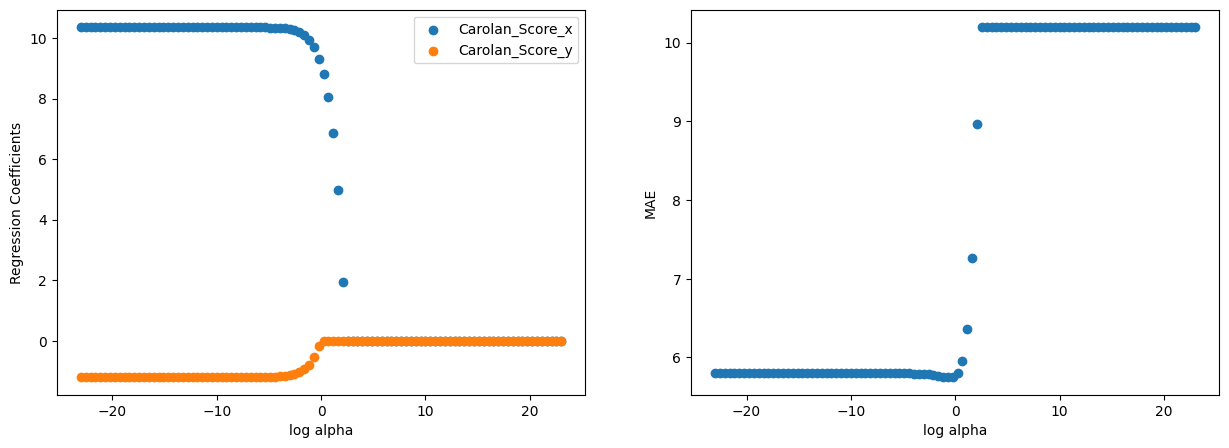

In [ ]:
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
Carolan_Score_x = []
Carolan_Score_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    Carolan_Score_x += [pipeline.steps[1][1].coef_[0]]
    Carolan_Score_y += [pipeline.steps[1][1].coef_[1]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'Carolan_Score_x':Carolan_Score_x,'Carolan_Score_y':Carolan_Score_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_x', data=plotdata[['log_alpha', 'Carolan_Score_x']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_y', data=plotdata[['log_alpha', 'Carolan_Score_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.000100
Intercept (b) -0.030176
Carolan_Score_x    10.352940
Carolan_Score_y    -1.201238
dtype: float64 

R2 train: 0.619
MSE train: 63.364,MSE test:66.441
MAE train: 5.716,MAE test:5.799


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
Carolan_Score_x    10.270880
Carolan_Score_y    -1.170725
dtype: float64 

R2 train: 0.618
MSE train: 63.371,MSE test:66.441
MAE train: 5.714,MAE test:5.796


## Carolan_Score_x + Carolan_Score_y + AdjEM_x + AdjEM_y

In [ ]:
X = Final_merge[['Carolan_Score_x','Carolan_Score_y', 'AdjEM_x', 'AdjEM_y']]
y = Final_merge['scoreDif']

In [ ]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use the Lasso algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Lasso(alpha =0.001, max_iter=10000))
pipeline.fit(X_train, y_train)

print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
Carolan_Score_x    5.543637
Carolan_Score_y   -0.374940
AdjEM_x            6.154222
AdjEM_y           -1.943933
dtype: float64 

R2 train: 0.674
MSE train: 54.069,MSE test:56.596
MAE train: 5.243,MAE test:5.328


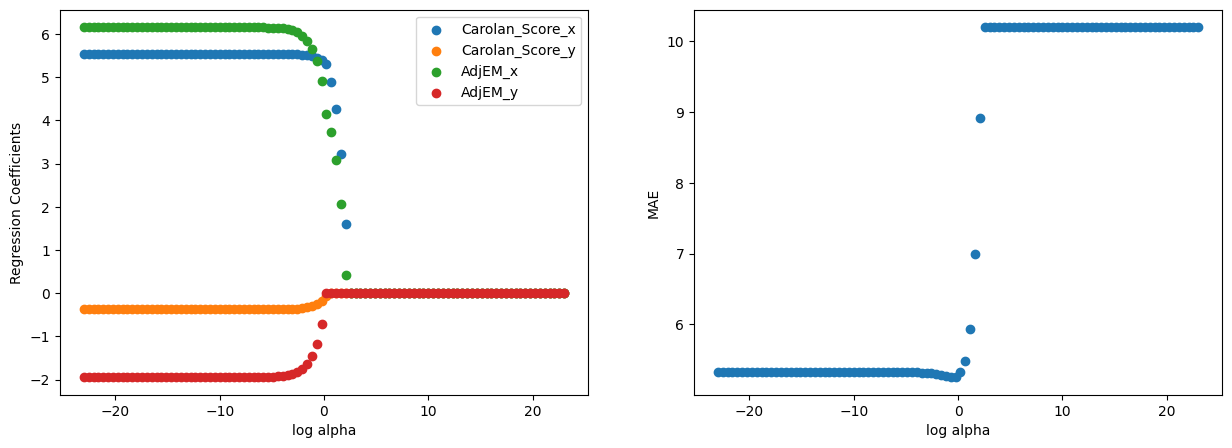

In [ ]:
#Let's use this neat function that returns numbers spaced evenly on a log scale (a geometric progression).
alphas=np.geomspace(1e-10, 1e10, num=100)

MAEs = []
Carolan_Score_x = []
Carolan_Score_y = []
AdjEM_x = []
AdjEM_y = []

for a in alphas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    pipeline.fit(X_train, y_train)
    Carolan_Score_x += [pipeline.steps[1][1].coef_[0]]
    Carolan_Score_y += [pipeline.steps[1][1].coef_[1]]
    AdjEM_x += [pipeline.steps[1][1].coef_[2]]
    AdjEM_y += [pipeline.steps[1][1].coef_[3]]

    y_test_pred = pipeline.predict(X_test)
    MAEs += [mean_absolute_error(y_test, y_test_pred)]

plotdata = pd.DataFrame({'log_alpha': np.log(alphas),'Carolan_Score_x':Carolan_Score_x,'Carolan_Score_y':Carolan_Score_y, 'AdjEM_x':AdjEM_x, 'AdjEM_y':AdjEM_y, 'MAE':MAEs})


fig,axes=plt.subplots(1,2,figsize=(15, 5))
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Income', data=plotdata[['log_alpha', 'Income']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Limit', data=plotdata[['log_alpha', 'Limit']]);
#sns.scatterplot(ax=axes[0],x='log_alpha', y='Rating', data=plotdata[['log_alpha', 'Rating']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_x', data=plotdata[['log_alpha', 'Carolan_Score_x']]);
axes[0].scatter(x='log_alpha', y='Carolan_Score_y', data=plotdata[['log_alpha', 'Carolan_Score_y']]);
axes[0].scatter(x='log_alpha', y='AdjEM_x', data=plotdata[['log_alpha', 'AdjEM_x']]);
axes[0].scatter(x='log_alpha', y='AdjEM_y', data=plotdata[['log_alpha', 'AdjEM_y']]);
axes[0].legend()
axes[0].set_xlabel("log alpha");
axes[0].set_ylabel("Regression Coefficients");
axes[1].scatter(x='log_alpha', y='MAE', data=plotdata[['log_alpha', 'MAE']]);
axes[1].set_xlabel("log alpha");
axes[1].set_ylabel("MAE");

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use LAssoCV algorithm for training the model
#
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train)
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Chosen alpha  0.000100
Intercept (b) -0.030176
Carolan_Score_x    5.543896
Carolan_Score_y   -0.375144
AdjEM_x            6.155575
AdjEM_y           -1.945331
dtype: float64 

R2 train: 0.674
MSE train: 54.069,MSE test:56.596
MAE train: 5.244,MAE test:5.328


In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use ElasticNet algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train)
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
r2_score_train = r2_score(y_train, y_train_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'MSE train: {MSE_train:.3f},MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f},MAE test:{MAE_test:.3f}')

Intercept (b) -0.030176
Carolan_Score_x    5.543844
Carolan_Score_y   -0.414952
AdjEM_x            6.088281
AdjEM_y           -1.866230
dtype: float64 

R2 train: 0.674
MSE train: 54.073,MSE test:56.603
MAE train: 5.239,MAE test:5.323
